In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from haversine import haversine, Unit
import warnings

warnings.filterwarnings("ignore")

custom_palette = {"Casual": "#e8f6b1", "Annual": "#65c3bf"}
sns.set_theme(style="ticks", palette="crest", font_scale=0.9)

In [2]:
df = pd.read_csv(r"/kaggle/input/cyclistic-cleaned-data/CyclisticData.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677348 entries, 0 to 5677347
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Ride_ID                 object 
 1   Bike_Type               object 
 2   Member_Type             object 
 3   Start_Station_Name      object 
 4   End_Station_Name        object 
 5   Start_Station_ID        object 
 6   End_Station_ID          object 
 7   Start_Latitude          float64
 8   Start_Longitude         float64
 9   End_Latitude            object 
 10  End_Longitude           object 
 11  Season                  object 
 12  Day_Of_Week             object 
 13  Started_Datetime        object 
 14  Ended_Datetime          object 
 15  Ride_Length             object 
 16  Ride_Length_In_Seconds  int64  
dtypes: float64(2), int64(1), object(14)
memory usage: 736.4+ MB


In [4]:
df.describe()

,Start_Latitude,Start_Longitude,Ride_Length_In_Seconds
count,5.677348e+06,5.677348e+06,5.677348e+06
mean,4.190286e+01,-8.764705e+01,1.093471e+03
std,4.512755e-02,2.738363e-02,1.094649e+04
min,4.163000e+01,-8.794000e+01,0.000000e+00
25%,4.188096e+01,-8.766000e+01,3.250000e+02
50%,4.189904e+01,-8.764403e+01,5.720000e+02
75%,4.193000e+01,-8.762991e+01,1.016000e+03
max,4.207000e+01,-8.746000e+01,5.909344e+06


In [5]:
df.isnull().sum()

Ride_ID                   0
Bike_Type                 0
Member_Type               0
Start_Station_Name        0
End_Station_Name          0
Start_Station_ID          0
End_Station_ID            0
Start_Latitude            0
Start_Longitude           0
End_Latitude              0
End_Longitude             0
Season                    0
Day_Of_Week               0
Started_Datetime          0
Ended_Datetime            0
Ride_Length               0
Ride_Length_In_Seconds    0
dtype: int64

In [6]:
df.nunique()

Ride_ID                   5677348
Bike_Type                       3
Member_Type                     2
Start_Station_Name           1589
End_Station_Name             1598
Start_Station_ID             1506
End_Station_ID               1514
Start_Latitude             786986
Start_Longitude            746344
End_Latitude                15605
End_Longitude               15694
Season                          4
Day_Of_Week                     7
Started_Datetime          4785950
Ended_Datetime            4797592
Ride_Length                 22903
Ride_Length_In_Seconds      22903
dtype: int64

In [7]:
df['Ride_Length_In_Minutes'] = df['Ride_Length_In_Seconds'] / 60
df.drop(columns=['Ride_Length_In_Seconds'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677348 entries, 0 to 5677347
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Ride_ID                 object 
 1   Bike_Type               object 
 2   Member_Type             object 
 3   Start_Station_Name      object 
 4   End_Station_Name        object 
 5   Start_Station_ID        object 
 6   End_Station_ID          object 
 7   Start_Latitude          float64
 8   Start_Longitude         float64
 9   End_Latitude            object 
 10  End_Longitude           object 
 11  Season                  object 
 12  Day_Of_Week             object 
 13  Started_Datetime        object 
 14  Ended_Datetime          object 
 15  Ride_Length             object 
 16  Ride_Length_In_Minutes  float64
dtypes: float64(3), object(14)
memory usage: 736.4+ MB


In [8]:
df.describe()

,Start_Latitude,Start_Longitude,Ride_Length_In_Minutes
count,5.677348e+06,5.677348e+06,5.677348e+06
mean,4.190286e+01,-8.764705e+01,1.822451e+01
std,4.512755e-02,2.738363e-02,1.824416e+02
min,4.163000e+01,-8.794000e+01,0.000000e+00
25%,4.188096e+01,-8.766000e+01,5.416667e+00
50%,4.189904e+01,-8.764403e+01,9.533333e+00
75%,4.193000e+01,-8.762991e+01,1.693333e+01
max,4.207000e+01,-8.746000e+01,9.848907e+04


In [9]:
df

,Ride_ID,Bike_Type,Member_Type,Start_Station_Name,End_Station_Name,Start_Station_ID,End_Station_ID,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Season,Day_Of_Week,Started_Datetime,Ended_Datetime,Ride_Length,Ride_Length_In_Minutes
0,65DBD2F447EC51C2,Electric,Annual,Clifton Ave & Armitage Ave,Sedgwick St & Webster Ave,TA1307000163,13191,41.918244,-87.657115,41.922167,-87.638888,Fall,Monday,2022-12-05 10:47:18,2022-12-05 10:56:34,00:09:16,9.266667
1,0C201AA7EA0EA1AD,Classic,Casual,Broadway & Belmont Ave,Sedgwick St & Webster Ave,13277,13191,41.940106,-87.645451,41.922167,-87.638888,Fall,Sunday,2022-12-18 06:42:33,2022-12-18 07:08:44,00:26:11,26.183333
2,E0B148CCB358A49D,Electric,Annual,Sangamon St & Lake St,St. Clair St & Erie St,TA1306000015,13016,41.885919,-87.651133,41.894345,-87.622798,Fall,Tuesday,2022-12-13 08:47:45,2022-12-13 08:59:51,00:12:06,12.100000
3,54C5775D2B7C9188,Classic,Annual,Shields Ave & 31st St,Damen Ave & Madison St,KA1503000038,13134,41.838464,-87.635406,41.88137,-87.67493,Fall,Tuesday,2022-12-13 18:50:47,2022-12-13 19:19:48,00:29:01,29.016667
4,A4891F78776D35DF,Classic,Casual,Ashland Ave & Chicago Ave,Damen Ave & Charleston St,13247,13288,41.895954,-87.667728,41.920082,-87.677855,Fall,Wednesday,2022-12-14 16:13:39,2022-12-14 16:27:50,00:14:11,14.183333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677343,30B44BD4C16E688C,Classic,Annual,Clark St & Wellington Ave,Southport Ave & Wellington Ave,TA1307000136,TA1307000006,41.936497,-87.647539,41.9357746176646,-87.6636001467705,Fall,Friday,2023-11-24 08:39:27,2023-11-24 08:47:03,00:07:36,7.600000
5677344,094A79892812BAB9,Classic,Annual,Aberdeen St & Jackson Blvd,Peoria St & Jackson Blvd,13157,13158,41.877726,-87.654787,41.8776415962753,-87.6496177911758,Fall,Monday,2023-11-06 09:07:20,2023-11-06 09:10:00,00:02:40,2.666667
5677345,F0A7DF8A44FDA3CB,Electric,Annual,Halsted St & Roscoe St,Southport Ave & Wellington Ave,TA1309000025,TA1307000006,41.943687,-87.648855,41.9357746176646,-87.6636001467705,Fall,Friday,2023-11-10 19:35:30,2023-11-10 19:44:28,00:08:58,8.966667
5677346,4D5E3685BB913A3C,Classic,Annual,Aberdeen St & Jackson Blvd,Peoria St & Jackson Blvd,13157,13158,41.877726,-87.654787,41.8776415962753,-87.6496177911758,Fall,Monday,2023-11-27 09:11:23,2023-11-27 09:13:23,00:02:00,2.000000


In [10]:
df = df[(df['End_Latitude'] != 'Unknown') & (df['End_Longitude'] != 'Unknown')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5670469 entries, 0 to 5677347
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Ride_ID                 object 
 1   Bike_Type               object 
 2   Member_Type             object 
 3   Start_Station_Name      object 
 4   End_Station_Name        object 
 5   Start_Station_ID        object 
 6   End_Station_ID          object 
 7   Start_Latitude          float64
 8   Start_Longitude         float64
 9   End_Latitude            object 
 10  End_Longitude           object 
 11  Season                  object 
 12  Day_Of_Week             object 
 13  Started_Datetime        object 
 14  Ended_Datetime          object 
 15  Ride_Length             object 
 16  Ride_Length_In_Minutes  float64
dtypes: float64(3), object(14)
memory usage: 778.7+ MB


In [11]:
df = df[(df['Start_Latitude'] != 0) & (df['Start_Longitude'] != 0) & (df['End_Longitude'] != 0) & (df['End_Latitude'] != 0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5670467 entries, 0 to 5677347
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Ride_ID                 object 
 1   Bike_Type               object 
 2   Member_Type             object 
 3   Start_Station_Name      object 
 4   End_Station_Name        object 
 5   Start_Station_ID        object 
 6   End_Station_ID          object 
 7   Start_Latitude          float64
 8   Start_Longitude         float64
 9   End_Latitude            object 
 10  End_Longitude           object 
 11  Season                  object 
 12  Day_Of_Week             object 
 13  Started_Datetime        object 
 14  Ended_Datetime          object 
 15  Ride_Length             object 
 16  Ride_Length_In_Minutes  float64
dtypes: float64(3), object(14)
memory usage: 778.7+ MB


In [12]:
df['Ride_Length'] = pd.to_timedelta(df['Ride_Length'])
convert_dtypes = {'Ride_ID': 'string', 
                'Bike_Type': 'category', 
                'Member_Type': 'category',
                'Start_Station_Name': 'string',
                'End_Station_Name': 'string',
                'Start_Station_ID': 'string',
                'End_Station_ID': 'string',
                'Start_Latitude': 'float64', 
                'Start_Longitude': 'float64', 
                'End_Latitude': 'float64',
                'End_Longitude': 'float64',
                'Season': 'category', 
                'Day_Of_Week': 'category', 
                'Started_Datetime': 'datetime64[ns]', 
                'Ended_Datetime': 'datetime64[ns]', 
                'Ride_Length_In_Minutes': 'float32'}
df = df.astype(convert_dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5670467 entries, 0 to 5677347
Data columns (total 17 columns):
 #   Column                  Dtype          
---  ------                  -----          
 0   Ride_ID                 string         
 1   Bike_Type               category       
 2   Member_Type             category       
 3   Start_Station_Name      string         
 4   End_Station_Name        string         
 5   Start_Station_ID        string         
 6   End_Station_ID          string         
 7   Start_Latitude          float64        
 8   Start_Longitude         float64        
 9   End_Latitude            float64        
 10  End_Longitude           float64        
 11  Season                  category       
 12  Day_Of_Week             category       
 13  Started_Datetime        datetime64[ns] 
 14  Ended_Datetime          datetime64[ns] 
 15  Ride_Length             timedelta64[ns]
 16  Ride_Length_In_Minutes  float32        
dtypes: category(4), datetime64[ns](2

In [13]:
df[(df['Start_Station_Name'] == 'Unknown') | (df['End_Station_Name'] == 'Unknown')]

,Ride_ID,Bike_Type,Member_Type,Start_Station_Name,End_Station_Name,Start_Station_ID,End_Station_ID,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Season,Day_Of_Week,Started_Datetime,Ended_Datetime,Ride_Length,Ride_Length_In_Minutes
33395,C0BCE4BA7DD45285,Electric,Annual,Public Rack - Keystone Ave & Irving Park Rd,Unknown,495,Unknown,41.950000,-87.730000,41.950000,-87.810000,Fall,Thursday,2022-12-08 17:01:14,2022-12-08 17:30:33,0 days 00:29:19,29.316668
33396,D21FC721E3260681,Electric,Annual,Franklin St & Monroe St,Unknown,TA1309000007,Unknown,41.879778,-87.635428,41.900000,-87.630000,Winter,Friday,2022-12-30 14:27:37,2022-12-30 14:40:08,0 days 00:12:31,12.516666
33397,3B8EF8638A5FA056,Electric,Annual,Franklin St & Monroe St,Unknown,TA1309000007,Unknown,41.879572,-87.635294,41.890000,-87.620000,Fall,Friday,2022-12-02 16:54:32,2022-12-02 17:08:16,0 days 00:13:44,13.733334
33398,D16E039494185A7A,Electric,Annual,Franklin St & Monroe St,Unknown,TA1309000007,Unknown,41.880176,-87.636336,41.910000,-87.670000,Fall,Thursday,2022-12-15 16:49:06,2022-12-15 17:11:31,0 days 00:22:25,22.416666
33399,EB14D4F59402C0D5,Electric,Annual,Franklin St & Monroe St,Unknown,TA1309000007,Unknown,41.879576,-87.635809,41.910000,-87.670000,Fall,Tuesday,2022-12-06 16:26:43,2022-12-06 16:44:07,0 days 00:17:24,17.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676223,0ECD0634764A807C,Electric,Annual,Unknown,Damen Ave & Madison St,Unknown,13134,41.910000,-87.680000,41.881370,-87.674930,Fall,Thursday,2023-11-09 08:11:22,2023-11-09 08:20:39,0 days 00:09:17,9.283334
5676228,C87482A2D6C8B6CF,Electric,Annual,Unknown,900 W Harrison St,Unknown,13028,41.870000,-87.660000,41.874754,-87.649807,Fall,Wednesday,2023-11-08 08:17:08,2023-11-08 08:20:19,0 days 00:03:11,3.183333
5676229,B4A36688AC371407,Electric,Annual,Unknown,Ellis Ave & 60th St,Unknown,KA1503000014,41.790000,-87.600000,41.785097,-87.601073,Fall,Tuesday,2023-11-07 15:37:22,2023-11-07 15:40:05,0 days 00:02:43,2.716667
5676230,91093CDC95D11D22,Electric,Annual,Unknown,Damen Ave & Madison St,Unknown,13134,41.930000,-87.640000,41.881370,-87.674930,Fall,Sunday,2023-11-05 16:48:27,2023-11-05 17:12:07,0 days 00:23:40,23.666666


In [14]:
df_start_station_u = df[(df['Start_Station_Name'] == 'Unknown')].groupby(['Start_Latitude','Start_Longitude'])['Ride_ID'].count().reset_index()
df_end_station_u = df[(df['End_Station_Name'] == 'Unknown')].groupby(['End_Latitude','End_Longitude'])['Ride_ID'].count().reset_index()

In [15]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

def get_street_name(latitude, longitude):
    try:
        geolocator = Nominatim(user_agent="Cyclistic-Bike-Share")
        location = geolocator.reverse((latitude, longitude), language='en', timeout=10)
        address = location.address
        # Extracting street name from address
        address_parts = address.split(",")
        if address_parts[0].strip().isdigit():
            # If so, concatenate the first and second parts
            street_name = address_parts[0].strip() + " " + address_parts[1].strip()
        else:
            # Otherwise, take the first part as the street name
            street_name = address_parts[1].strip() + " " + address_parts[0].strip()
        return street_name
    except GeocoderTimedOut:
        return "Geocoding service timed out"

In [16]:
def add_street_names(df_station_u, latitude_col, longitude_col):
    street_names = []
    for index, row in df_station_u.iterrows():
        latitude = row[latitude_col]
        longitude = row[longitude_col]
        street_name = get_street_name(latitude, longitude)
        street_names.append(street_name)
    df_station_u['Street_Name'] = street_names
    return df_station_u

df_start_station_u = add_street_names(df_start_station_u, 'Start_Latitude', 'Start_Longitude')
df_end_station_u = add_street_names(df_end_station_u, 'End_Latitude', 'End_Longitude')

In [17]:
df_start_station_u

,Start_Latitude,Start_Longitude,Ride_ID,Street_Name
0,41.63,-87.46,1,East Chicago Avenue Calumet Tower
1,41.64,-87.54,2,14049 South Burnham Avenue
2,41.65,-87.62,1,Riverdale East 135th Place
3,41.65,-87.61,3,455 East 134th Place
4,41.65,-87.60,20,905 East 134th Street
...,...,...,...,...
726,42.07,-87.72,7,276 Lawndale Avenue
727,42.07,-87.71,15,1279 Gregory Avenue
728,42.07,-87.70,36,801 Gregory Avenue
729,42.07,-87.69,83,310 Gregory Avenue


In [18]:
df_end_station_u

,End_Latitude,End_Longitude,Ride_ID,Street_Name
0,41.61,-87.54,1,611 157th Street
1,41.62,-87.63,1,14741 Gwendolyn Brooks Middle School
2,41.62,-87.58,1,15144 Harper Avenue
3,41.62,-87.56,1,565 Hoxie Avenue
4,41.62,-87.53,1,560 Woodrow Wilson Elementary School
...,...,...,...,...
888,42.11,-87.73,3,621 Park Avenue
889,42.12,-87.77,1,North Branch Black Paved Trail Skokie Lagoon #4
890,42.13,-87.79,2,1299 Midway Road
891,42.15,-87.79,1,1000 Chicago Botanic Gardens


In [19]:
# Merge df_start_station_u into df based on Start_Latitude and Start_Longitude
df = pd.merge(df, df_start_station_u[['Start_Latitude', 'Start_Longitude', 'Street_Name']], 
              on=['Start_Latitude', 'Start_Longitude'], how='left')

# Replace 'Start_Station_Name' == 'Unknown' with the Street_Name where available
df.loc[df['Start_Station_Name'] == 'Unknown', 'Start_Station_Name'] = df['Street_Name']

# Drop the 'Street_Name' column as it's no longer needed
df.drop(columns=['Street_Name'], inplace=True)

# Merge df_end_station_u into df based on End_Latitude and End_Longitude
df = pd.merge(df, df_end_station_u[['End_Latitude', 'End_Longitude', 'Street_Name']], 
              on=['End_Latitude', 'End_Longitude'], how='left')

# Replace 'End_Station_Name' == 'Unknown' with the Street_Name where available
df.loc[df['End_Station_Name'] == 'Unknown', 'End_Station_Name'] = df['Street_Name']

# Drop the 'Street_Name' column as it's no longer needed
df.drop(columns=['Street_Name'], inplace=True)

df

,Ride_ID,Bike_Type,Member_Type,Start_Station_Name,End_Station_Name,Start_Station_ID,End_Station_ID,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Season,Day_Of_Week,Started_Datetime,Ended_Datetime,Ride_Length,Ride_Length_In_Minutes
0,65DBD2F447EC51C2,Electric,Annual,Clifton Ave & Armitage Ave,Sedgwick St & Webster Ave,TA1307000163,13191,41.918244,-87.657115,41.922167,-87.638888,Fall,Monday,2022-12-05 10:47:18,2022-12-05 10:56:34,0 days 00:09:16,9.266666
1,0C201AA7EA0EA1AD,Classic,Casual,Broadway & Belmont Ave,Sedgwick St & Webster Ave,13277,13191,41.940106,-87.645451,41.922167,-87.638888,Fall,Sunday,2022-12-18 06:42:33,2022-12-18 07:08:44,0 days 00:26:11,26.183332
2,E0B148CCB358A49D,Electric,Annual,Sangamon St & Lake St,St. Clair St & Erie St,TA1306000015,13016,41.885919,-87.651133,41.894345,-87.622798,Fall,Tuesday,2022-12-13 08:47:45,2022-12-13 08:59:51,0 days 00:12:06,12.100000
3,54C5775D2B7C9188,Classic,Annual,Shields Ave & 31st St,Damen Ave & Madison St,KA1503000038,13134,41.838464,-87.635406,41.881370,-87.674930,Fall,Tuesday,2022-12-13 18:50:47,2022-12-13 19:19:48,0 days 00:29:01,29.016666
4,A4891F78776D35DF,Classic,Casual,Ashland Ave & Chicago Ave,Damen Ave & Charleston St,13247,13288,41.895954,-87.667728,41.920082,-87.677855,Fall,Wednesday,2022-12-14 16:13:39,2022-12-14 16:27:50,0 days 00:14:11,14.183333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5670462,30B44BD4C16E688C,Classic,Annual,Clark St & Wellington Ave,Southport Ave & Wellington Ave,TA1307000136,TA1307000006,41.936497,-87.647539,41.935775,-87.663600,Fall,Friday,2023-11-24 08:39:27,2023-11-24 08:47:03,0 days 00:07:36,7.600000
5670463,094A79892812BAB9,Classic,Annual,Aberdeen St & Jackson Blvd,Peoria St & Jackson Blvd,13157,13158,41.877726,-87.654787,41.877642,-87.649618,Fall,Monday,2023-11-06 09:07:20,2023-11-06 09:10:00,0 days 00:02:40,2.666667
5670464,F0A7DF8A44FDA3CB,Electric,Annual,Halsted St & Roscoe St,Southport Ave & Wellington Ave,TA1309000025,TA1307000006,41.943687,-87.648855,41.935775,-87.663600,Fall,Friday,2023-11-10 19:35:30,2023-11-10 19:44:28,0 days 00:08:58,8.966666
5670465,4D5E3685BB913A3C,Classic,Annual,Aberdeen St & Jackson Blvd,Peoria St & Jackson Blvd,13157,13158,41.877726,-87.654787,41.877642,-87.649618,Fall,Monday,2023-11-27 09:11:23,2023-11-27 09:13:23,0 days 00:02:00,2.000000


In [20]:
df['Ride_Length_In_Minutes'].describe()

count    5.670467e+06
mean     1.516172e+01
std      3.301406e+01
min      0.000000e+00
25%      5.416667e+00
50%      9.516666e+00
75%      1.688333e+01
max      1.213630e+04
Name: Ride_Length_In_Minutes, dtype: float64

In [21]:
df.describe()

,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Started_Datetime,Ended_Datetime,Ride_Length,Ride_Length_In_Minutes
count,5.670467e+06,5.670467e+06,5.670467e+06,5.670467e+06,5670467,5670467,5670467,5.670467e+06
mean,4.190288e+01,-8.764706e+01,4.190321e+01,-8.764725e+01,2023-07-03 13:53:36.394180352,2023-07-03 14:08:46.097605632,0 days 00:15:09.703425308,1.516172e+01
min,4.163000e+01,-8.794000e+01,0.000000e+00,-8.816000e+01,2022-12-01 00:01:22,2022-12-01 00:03:41,0 days 00:00:00,0.000000e+00
25%,4.188096e+01,-8.766000e+01,4.188103e+01,-8.766027e+01,2023-05-10 19:32:52,2023-05-10 19:48:08,0 days 00:05:25,5.416667e+00
50%,4.189913e+01,-8.764404e+01,4.190000e+01,-8.764410e+01,2023-07-13 03:43:37,2023-07-13 04:09:50,0 days 00:09:31,9.516666e+00
75%,4.193000e+01,-8.762991e+01,4.193000e+01,-8.762991e+01,2023-09-07 09:26:36,2023-09-07 09:39:45.500000,0 days 00:16:53,1.688333e+01
max,4.207000e+01,-8.746000e+01,4.218000e+01,0.000000e+00,2023-11-30 23:59:14,2023-12-01 17:00:47,8 days 10:16:18,1.213630e+04
std,4.511030e-02,2.737791e-02,4.856205e-02,4.595162e-02,NaN,NaN,0 days 00:33:00.843354880,3.301406e+01


In [22]:
df = df[df['Ride_Length'] > pd.Timedelta(minutes=2)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5405752 entries, 0 to 5670464
Data columns (total 17 columns):
 #   Column                  Dtype          
---  ------                  -----          
 0   Ride_ID                 string         
 1   Bike_Type               category       
 2   Member_Type             category       
 3   Start_Station_Name      string         
 4   End_Station_Name        string         
 5   Start_Station_ID        string         
 6   End_Station_ID          string         
 7   Start_Latitude          float64        
 8   Start_Longitude         float64        
 9   End_Latitude            float64        
 10  End_Longitude           float64        
 11  Season                  category       
 12  Day_Of_Week             category       
 13  Started_Datetime        datetime64[ns] 
 14  Ended_Datetime          datetime64[ns] 
 15  Ride_Length             timedelta64[ns]
 16  Ride_Length_In_Minutes  float32        
dtypes: category(4), datetime64[ns](2

In [23]:
# Calculate mean and standard deviation
mean = df['Ride_Length_In_Minutes'].mean()
std_dev = df['Ride_Length_In_Minutes'].std()

# Calculate z-score for each data point
z_score = (df['Ride_Length_In_Minutes'] - mean) / std_dev

# Set threshold (e.g., 3 standard deviations)
threshold = 3

# Identify extreme outliers
extreme_outliers = df[z_score > threshold]

# Remove extreme outliers from DataFrame
df = df[z_score <= threshold]

In [24]:
df

,Ride_ID,Bike_Type,Member_Type,Start_Station_Name,End_Station_Name,Start_Station_ID,End_Station_ID,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Season,Day_Of_Week,Started_Datetime,Ended_Datetime,Ride_Length,Ride_Length_In_Minutes
0,65DBD2F447EC51C2,Electric,Annual,Clifton Ave & Armitage Ave,Sedgwick St & Webster Ave,TA1307000163,13191,41.918244,-87.657115,41.922167,-87.638888,Fall,Monday,2022-12-05 10:47:18,2022-12-05 10:56:34,0 days 00:09:16,9.266666
1,0C201AA7EA0EA1AD,Classic,Casual,Broadway & Belmont Ave,Sedgwick St & Webster Ave,13277,13191,41.940106,-87.645451,41.922167,-87.638888,Fall,Sunday,2022-12-18 06:42:33,2022-12-18 07:08:44,0 days 00:26:11,26.183332
2,E0B148CCB358A49D,Electric,Annual,Sangamon St & Lake St,St. Clair St & Erie St,TA1306000015,13016,41.885919,-87.651133,41.894345,-87.622798,Fall,Tuesday,2022-12-13 08:47:45,2022-12-13 08:59:51,0 days 00:12:06,12.100000
3,54C5775D2B7C9188,Classic,Annual,Shields Ave & 31st St,Damen Ave & Madison St,KA1503000038,13134,41.838464,-87.635406,41.881370,-87.674930,Fall,Tuesday,2022-12-13 18:50:47,2022-12-13 19:19:48,0 days 00:29:01,29.016666
4,A4891F78776D35DF,Classic,Casual,Ashland Ave & Chicago Ave,Damen Ave & Charleston St,13247,13288,41.895954,-87.667728,41.920082,-87.677855,Fall,Wednesday,2022-12-14 16:13:39,2022-12-14 16:27:50,0 days 00:14:11,14.183333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5670460,55A798851D4B9AE4,Classic,Annual,Aberdeen St & Jackson Blvd,Green St & Madison St,13157,TA1307000120,41.877726,-87.654787,41.881859,-87.649264,Fall,Saturday,2023-11-18 13:05:21,2023-11-18 13:08:46,0 days 00:03:25,3.416667
5670461,B80D6930328640ED,Classic,Annual,Aberdeen St & Jackson Blvd,Peoria St & Jackson Blvd,13157,13158,41.877726,-87.654787,41.877642,-87.649618,Fall,Friday,2023-11-03 17:04:45,2023-11-03 17:07:50,0 days 00:03:05,3.083333
5670462,30B44BD4C16E688C,Classic,Annual,Clark St & Wellington Ave,Southport Ave & Wellington Ave,TA1307000136,TA1307000006,41.936497,-87.647539,41.935775,-87.663600,Fall,Friday,2023-11-24 08:39:27,2023-11-24 08:47:03,0 days 00:07:36,7.600000
5670463,094A79892812BAB9,Classic,Annual,Aberdeen St & Jackson Blvd,Peoria St & Jackson Blvd,13157,13158,41.877726,-87.654787,41.877642,-87.649618,Fall,Monday,2023-11-06 09:07:20,2023-11-06 09:10:00,0 days 00:02:40,2.666667


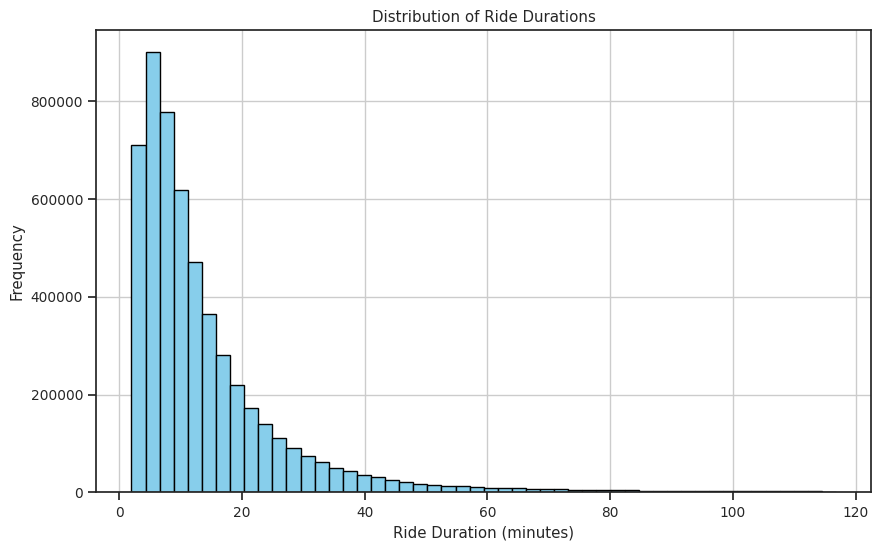

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['Ride_Length_In_Minutes'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Ride Durations')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [26]:
df['Ride_Distance'] = df.apply(lambda row: haversine((row['Start_Latitude'], row['Start_Longitude']), (row['End_Latitude'], row['End_Longitude']), unit=Unit.KILOMETERS), axis=1)

In [27]:
pd.set_option('display.max_columns', 10)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 5370143 entries, 0 to 5670464
Data columns (total 18 columns):
 #   Column                  Dtype          
---  ------                  -----          
 0   Ride_ID                 string         
 1   Bike_Type               category       
 2   Member_Type             category       
 3   Start_Station_Name      string         
 4   End_Station_Name        string         
 5   Start_Station_ID        string         
 6   End_Station_ID          string         
 7   Start_Latitude          float64        
 8   Start_Longitude         float64        
 9   End_Latitude            float64        
 10  End_Longitude           float64        
 11  Season                  category       
 12  Day_Of_Week             category       
 13  Started_Datetime        datetime64[ns] 
 14  Ended_Datetime          datetime64[ns] 
 15  Ride_Length             timedelta64[ns]
 16  Ride_Length_In_Minutes  float32        
 17  Ride_Distance           float64 

,Ride_ID,Bike_Type,Member_Type,Start_Station_Name,End_Station_Name,...,Started_Datetime,Ended_Datetime,Ride_Length,Ride_Length_In_Minutes,Ride_Distance
0,65DBD2F447EC51C2,Electric,Annual,Clifton Ave & Armitage Ave,Sedgwick St & Webster Ave,...,2022-12-05 10:47:18,2022-12-05 10:56:34,0 days 00:09:16,9.266666,1.569870
1,0C201AA7EA0EA1AD,Classic,Casual,Broadway & Belmont Ave,Sedgwick St & Webster Ave,...,2022-12-18 06:42:33,2022-12-18 07:08:44,0 days 00:26:11,26.183332,2.067292
2,E0B148CCB358A49D,Electric,Annual,Sangamon St & Lake St,St. Clair St & Erie St,...,2022-12-13 08:47:45,2022-12-13 08:59:51,0 days 00:12:06,12.100000,2.525681
3,54C5775D2B7C9188,Classic,Annual,Shields Ave & 31st St,Damen Ave & Madison St,...,2022-12-13 18:50:47,2022-12-13 19:19:48,0 days 00:29:01,29.016666,5.785821
4,A4891F78776D35DF,Classic,Casual,Ashland Ave & Chicago Ave,Damen Ave & Charleston St,...,2022-12-14 16:13:39,2022-12-14 16:27:50,0 days 00:14:11,14.183333,2.810716
...,...,...,...,...,...,...,...,...,...,...,...
5670460,55A798851D4B9AE4,Classic,Annual,Aberdeen St & Jackson Blvd,Green St & Madison St,...,2023-11-18 13:05:21,2023-11-18 13:08:46,0 days 00:03:25,3.416667,0.648346
5670461,B80D6930328640ED,Classic,Annual,Aberdeen St & Jackson Blvd,Peoria St & Jackson Blvd,...,2023-11-03 17:04:45,2023-11-03 17:07:50,0 days 00:03:05,3.083333,0.428112
5670462,30B44BD4C16E688C,Classic,Annual,Clark St & Wellington Ave,Southport Ave & Wellington Ave,...,2023-11-24 08:39:27,2023-11-24 08:47:03,0 days 00:07:36,7.600000,1.330982
5670463,094A79892812BAB9,Classic,Annual,Aberdeen St & Jackson Blvd,Peoria St & Jackson Blvd,...,2023-11-06 09:07:20,2023-11-06 09:10:00,0 days 00:02:40,2.666667,0.428112


In [28]:
df.describe()

,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Started_Datetime,Ended_Datetime,Ride_Length,Ride_Length_In_Minutes,Ride_Distance
count,5.370143e+06,5.370143e+06,5.370143e+06,5.370143e+06,5370143,5370143,5370143,5.370143e+06,5.370143e+06
mean,4.190309e+01,-8.764712e+01,4.190345e+01,-8.764733e+01,2023-07-04 01:30:05.455648256,2023-07-04 01:44:16.586100224,0 days 00:14:11.130449971,1.418550e+01,2.191100e+00
min,4.163000e+01,-8.794000e+01,4.161000e+01,-8.816000e+01,2022-12-01 00:01:22,2022-12-01 00:03:41,0 days 00:02:01,2.016667e+00,0.000000e+00
25%,4.188103e+01,-8.766014e+01,4.188103e+01,-8.766028e+01,2023-05-11 15:34:34,2023-05-11 15:50:19,0 days 00:05:54,5.900000e+00,9.668760e-01
50%,4.189964e+01,-8.764410e+01,4.190000e+01,-8.764414e+01,2023-07-13 17:16:05,2023-07-13 17:31:07,0 days 00:09:56,9.933333e+00,1.620708e+00
75%,4.193000e+01,-8.762994e+01,4.193125e+01,-8.763000e+01,2023-09-07 17:25:23,2023-09-07 17:39:40,0 days 00:17:13,1.721667e+01,2.829142e+00
max,4.207000e+01,-8.746000e+01,4.218000e+01,-8.744000e+01,2023-11-30 23:59:14,2023-12-01 00:31:09,0 days 01:56:49,1.168167e+02,4.892887e+01
std,4.498607e-02,2.728041e-02,4.514553e-02,2.741847e-02,NaN,NaN,0 days 00:13:38.726547058,1.364544e+01,1.881739e+00


In [29]:
df['Ride_Length_In_Hours'] = df['Ride_Length_In_Minutes'] / 60
df['Ride_Speed_kph'] = df['Ride_Distance'] / df['Ride_Length_In_Hours']

In [30]:
df['Ride_Speed_kph']

0          10.164624
1           4.737271
2          12.524039
3          11.963788
4          11.890222
             ...    
5670460    11.385595
5670461     8.330820
5670462    10.507752
5670463     9.632510
5670464    10.062613
Name: Ride_Speed_kph, Length: 5370143, dtype: float64

In [31]:
df.columns

Index(['Ride_ID', 'Bike_Type', 'Member_Type', 'Start_Station_Name',
       'End_Station_Name', 'Start_Station_ID', 'End_Station_ID',
       'Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude',
       'Season', 'Day_Of_Week', 'Started_Datetime', 'Ended_Datetime',
       'Ride_Length', 'Ride_Length_In_Minutes', 'Ride_Distance',
       'Ride_Length_In_Hours', 'Ride_Speed_kph'],
      dtype='object')

In [32]:
median_ride_speed = df['Ride_Speed_kph'].median()
df['Ride_Distance'] = np.where(df['Ride_Distance'] < 0.2, df['Ride_Length_In_Hours'] * median_ride_speed, df['Ride_Distance'])
df['Ride_Speed_kph'] = np.where(df['Ride_Speed_kph'] == 0.0, df['Ride_Distance'] / df['Ride_Length_In_Hours'], df['Ride_Speed_kph'])

In [33]:
median_ride_speed

11.12618687831301

In [34]:
df.drop(columns=['Ride_Speed_kph','Ride_Length_In_Hours'], inplace=True)
df

,Ride_ID,Bike_Type,Member_Type,Start_Station_Name,End_Station_Name,...,Started_Datetime,Ended_Datetime,Ride_Length,Ride_Length_In_Minutes,Ride_Distance
0,65DBD2F447EC51C2,Electric,Annual,Clifton Ave & Armitage Ave,Sedgwick St & Webster Ave,...,2022-12-05 10:47:18,2022-12-05 10:56:34,0 days 00:09:16,9.266666,1.569870
1,0C201AA7EA0EA1AD,Classic,Casual,Broadway & Belmont Ave,Sedgwick St & Webster Ave,...,2022-12-18 06:42:33,2022-12-18 07:08:44,0 days 00:26:11,26.183332,2.067292
2,E0B148CCB358A49D,Electric,Annual,Sangamon St & Lake St,St. Clair St & Erie St,...,2022-12-13 08:47:45,2022-12-13 08:59:51,0 days 00:12:06,12.100000,2.525681
3,54C5775D2B7C9188,Classic,Annual,Shields Ave & 31st St,Damen Ave & Madison St,...,2022-12-13 18:50:47,2022-12-13 19:19:48,0 days 00:29:01,29.016666,5.785821
4,A4891F78776D35DF,Classic,Casual,Ashland Ave & Chicago Ave,Damen Ave & Charleston St,...,2022-12-14 16:13:39,2022-12-14 16:27:50,0 days 00:14:11,14.183333,2.810716
...,...,...,...,...,...,...,...,...,...,...,...
5670460,55A798851D4B9AE4,Classic,Annual,Aberdeen St & Jackson Blvd,Green St & Madison St,...,2023-11-18 13:05:21,2023-11-18 13:08:46,0 days 00:03:25,3.416667,0.648346
5670461,B80D6930328640ED,Classic,Annual,Aberdeen St & Jackson Blvd,Peoria St & Jackson Blvd,...,2023-11-03 17:04:45,2023-11-03 17:07:50,0 days 00:03:05,3.083333,0.428112
5670462,30B44BD4C16E688C,Classic,Annual,Clark St & Wellington Ave,Southport Ave & Wellington Ave,...,2023-11-24 08:39:27,2023-11-24 08:47:03,0 days 00:07:36,7.600000,1.330982
5670463,094A79892812BAB9,Classic,Annual,Aberdeen St & Jackson Blvd,Peoria St & Jackson Blvd,...,2023-11-06 09:07:20,2023-11-06 09:10:00,0 days 00:02:40,2.666667,0.428112


In [35]:
df.describe()

,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Started_Datetime,Ended_Datetime,Ride_Length,Ride_Length_In_Minutes,Ride_Distance
count,5.370143e+06,5.370143e+06,5.370143e+06,5.370143e+06,5370143,5370143,5370143,5.370143e+06,5.370143e+06
mean,4.190309e+01,-8.764712e+01,4.190345e+01,-8.764733e+01,2023-07-04 01:30:05.455648256,2023-07-04 01:44:16.586100224,0 days 00:14:11.130449971,1.418550e+01,2.382931e+00
min,4.163000e+01,-8.794000e+01,4.161000e+01,-8.816000e+01,2022-12-01 00:01:22,2022-12-01 00:03:41,0 days 00:02:01,2.016667e+00,2.000034e-01
25%,4.188103e+01,-8.766014e+01,4.188103e+01,-8.766028e+01,2023-05-11 15:34:34,2023-05-11 15:50:19,0 days 00:05:54,5.900000e+00,1.033310e+00
50%,4.189964e+01,-8.764410e+01,4.190000e+01,-8.764414e+01,2023-07-13 17:16:05,2023-07-13 17:31:07,0 days 00:09:56,9.933333e+00,1.700885e+00
75%,4.193000e+01,-8.762994e+01,4.193125e+01,-8.763000e+01,2023-09-07 17:25:23,2023-09-07 17:39:40,0 days 00:17:13,1.721667e+01,2.988770e+00
max,4.207000e+01,-8.746000e+01,4.218000e+01,-8.744000e+01,2023-11-30 23:59:14,2023-12-01 00:31:09,0 days 01:56:49,1.168167e+02,4.892887e+01
std,4.498607e-02,2.728041e-02,4.514553e-02,2.741847e-02,NaN,NaN,0 days 00:13:38.726547058,1.364544e+01,2.108971e+00


In [36]:
# Calculate mean and standard deviation
mean = df['Ride_Distance'].mean()
std_dev = df['Ride_Distance'].std()

# Calculate z-score for each data point
z_score = (df['Ride_Distance'] - mean) / std_dev

# Set threshold (e.g., 3 standard deviations)
threshold = 3

# Identify extreme outliers
extreme_outliers = df[z_score > threshold]

# Remove extreme outliers from DataFrame
df = df[z_score <= threshold]

In [37]:
df

,Ride_ID,Bike_Type,Member_Type,Start_Station_Name,End_Station_Name,...,Started_Datetime,Ended_Datetime,Ride_Length,Ride_Length_In_Minutes,Ride_Distance
0,65DBD2F447EC51C2,Electric,Annual,Clifton Ave & Armitage Ave,Sedgwick St & Webster Ave,...,2022-12-05 10:47:18,2022-12-05 10:56:34,0 days 00:09:16,9.266666,1.569870
1,0C201AA7EA0EA1AD,Classic,Casual,Broadway & Belmont Ave,Sedgwick St & Webster Ave,...,2022-12-18 06:42:33,2022-12-18 07:08:44,0 days 00:26:11,26.183332,2.067292
2,E0B148CCB358A49D,Electric,Annual,Sangamon St & Lake St,St. Clair St & Erie St,...,2022-12-13 08:47:45,2022-12-13 08:59:51,0 days 00:12:06,12.100000,2.525681
3,54C5775D2B7C9188,Classic,Annual,Shields Ave & 31st St,Damen Ave & Madison St,...,2022-12-13 18:50:47,2022-12-13 19:19:48,0 days 00:29:01,29.016666,5.785821
4,A4891F78776D35DF,Classic,Casual,Ashland Ave & Chicago Ave,Damen Ave & Charleston St,...,2022-12-14 16:13:39,2022-12-14 16:27:50,0 days 00:14:11,14.183333,2.810716
...,...,...,...,...,...,...,...,...,...,...,...
5670460,55A798851D4B9AE4,Classic,Annual,Aberdeen St & Jackson Blvd,Green St & Madison St,...,2023-11-18 13:05:21,2023-11-18 13:08:46,0 days 00:03:25,3.416667,0.648346
5670461,B80D6930328640ED,Classic,Annual,Aberdeen St & Jackson Blvd,Peoria St & Jackson Blvd,...,2023-11-03 17:04:45,2023-11-03 17:07:50,0 days 00:03:05,3.083333,0.428112
5670462,30B44BD4C16E688C,Classic,Annual,Clark St & Wellington Ave,Southport Ave & Wellington Ave,...,2023-11-24 08:39:27,2023-11-24 08:47:03,0 days 00:07:36,7.600000,1.330982
5670463,094A79892812BAB9,Classic,Annual,Aberdeen St & Jackson Blvd,Peoria St & Jackson Blvd,...,2023-11-06 09:07:20,2023-11-06 09:10:00,0 days 00:02:40,2.666667,0.428112


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5264229 entries, 0 to 5670464
Data columns (total 18 columns):
 #   Column                  Dtype          
---  ------                  -----          
 0   Ride_ID                 string         
 1   Bike_Type               category       
 2   Member_Type             category       
 3   Start_Station_Name      string         
 4   End_Station_Name        string         
 5   Start_Station_ID        string         
 6   End_Station_ID          string         
 7   Start_Latitude          float64        
 8   Start_Longitude         float64        
 9   End_Latitude            float64        
 10  End_Longitude           float64        
 11  Season                  category       
 12  Day_Of_Week             category       
 13  Started_Datetime        datetime64[ns] 
 14  Ended_Datetime          datetime64[ns] 
 15  Ride_Length             timedelta64[ns]
 16  Ride_Length_In_Minutes  float32        
 17  Ride_Distance           float64 

In [39]:
df.describe()

,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Started_Datetime,Ended_Datetime,Ride_Length,Ride_Length_In_Minutes,Ride_Distance
count,5.264229e+06,5.264229e+06,5.264229e+06,5.264229e+06,5264229,5264229,5264229,5.264229e+06,5.264229e+06
mean,4.190313e+01,-8.764725e+01,4.190346e+01,-8.764746e+01,2023-07-03 22:41:46.514176768,2023-07-03 22:55:07.810574592,0 days 00:13:21.296398579,1.335494e+01,2.199181e+00
min,4.164000e+01,-8.792000e+01,4.161000e+01,-8.792000e+01,2022-12-01 00:01:22,2022-12-01 00:03:41,0 days 00:02:01,2.016667e+00,2.000034e-01
25%,4.188103e+01,-8.766014e+01,4.188103e+01,-8.766098e+01,2023-05-11 08:41:00,2023-05-11 08:53:34,0 days 00:05:50,5.833333e+00,1.023858e+00
50%,4.189984e+01,-8.764410e+01,4.190000e+01,-8.764414e+01,2023-07-13 17:01:12,2023-07-13 17:14:50,0 days 00:09:44,9.733334e+00,1.664681e+00
75%,4.193000e+01,-8.763000e+01,4.193000e+01,-8.763000e+01,2023-09-07 19:12:26,2023-09-07 19:24:31,0 days 00:16:34,1.656667e+01,2.875015e+00
max,4.207000e+01,-8.752000e+01,4.211000e+01,-8.749000e+01,2023-11-30 23:59:14,2023-12-01 00:31:09,0 days 01:56:49,1.168167e+02,8.709828e+00
std,4.461398e-02,2.704761e-02,4.475348e-02,2.717965e-02,NaN,NaN,0 days 00:12:03.801732036,1.206336e+01,1.631738e+00


In [40]:
## Export the clean dataset (optional)
# filename = 'cyclist_clean.csv'
# df.to_csv(filename, index=False)

               Count
Member_Type         
Annual       3387277
Casual       1876952
Total        5264229


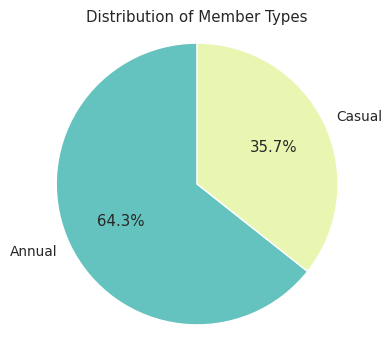

In [41]:
member_type = df["Member_Type"].value_counts()
total_count = member_type.sum()
member_type_df = pd.DataFrame(member_type)
member_type_df.columns = ['Count']
member_type_df.loc['Total'] = total_count

plt.figure(figsize=(4, 4))
plt.pie(member_type.values, labels=member_type.index, autopct='%1.1f%%', startangle=90, colors=[custom_palette.get(member, '#CCCCCC') for member in member_type.index])
plt.title('Distribution of Member Types')
plt.axis('equal')

print(member_type_df)

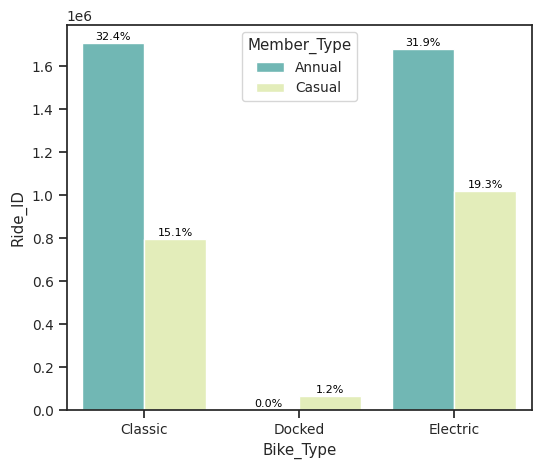

  Bike_Type Member_Type  Ride_ID
0   Classic      Annual  1706548
1   Classic      Casual   794550
2    Docked      Annual        0
3    Docked      Casual    64158
4  Electric      Annual  1680729
5  Electric      Casual  1018244


In [42]:
bike_types = df.groupby(["Bike_Type", "Member_Type"])['Ride_ID'].count().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(x='Bike_Type', y='Ride_ID', hue='Member_Type', data=bike_types, palette=custom_palette)

total_counts = sum([p.get_height() for p in plt.gca().patches])
for p in plt.gca().patches:
    plt.annotate('{:.1f}%'.format(p.get_height() / total_counts * 100),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 1),
                 textcoords='offset points')
plt.show()

print(bike_types)

In [43]:
months = df['Started_Datetime'].dt.month
hours = df['Started_Datetime'].dt.hour
days = df['Started_Datetime'].dt.day
week_order = ["Monday","Tuesday","Wednesday",'Thursday','Friday','Saturday','Sunday']
df['Day_Of_Week'] = pd.Categorical(df['Day_Of_Week'], categories=week_order, ordered=True)
season_order = ["Spring","Summer","Fall","Winter"]
df['Season'] = pd.Categorical(df['Season'], categories=season_order, ordered=True)
hours_order = sorted(hours.unique())
days_order = sorted(days.unique())

annual_members = df[df['Member_Type']=='Annual']
casual_members = df[df['Member_Type']=='Casual']

In [44]:
monthly_counts = df.groupby([months, "Member_Type"])['Ride_ID'].count().reset_index()
month_names = [calendar.month_name[month] for month in sorted(months.unique())]
day_counts = df.groupby([df["Started_Datetime"].dt.day,"Member_Type"])['Ride_ID'].count().reset_index()
week_counts = df.groupby(["Day_Of_Week","Member_Type"])['Ride_ID'].count().reset_index()
hour_counts = df.groupby([df["Started_Datetime"].dt.hour,"Member_Type"])['Ride_ID'].count().reset_index()
season_counts = df.groupby(["Season","Member_Type"])['Ride_ID'].count().reset_index()

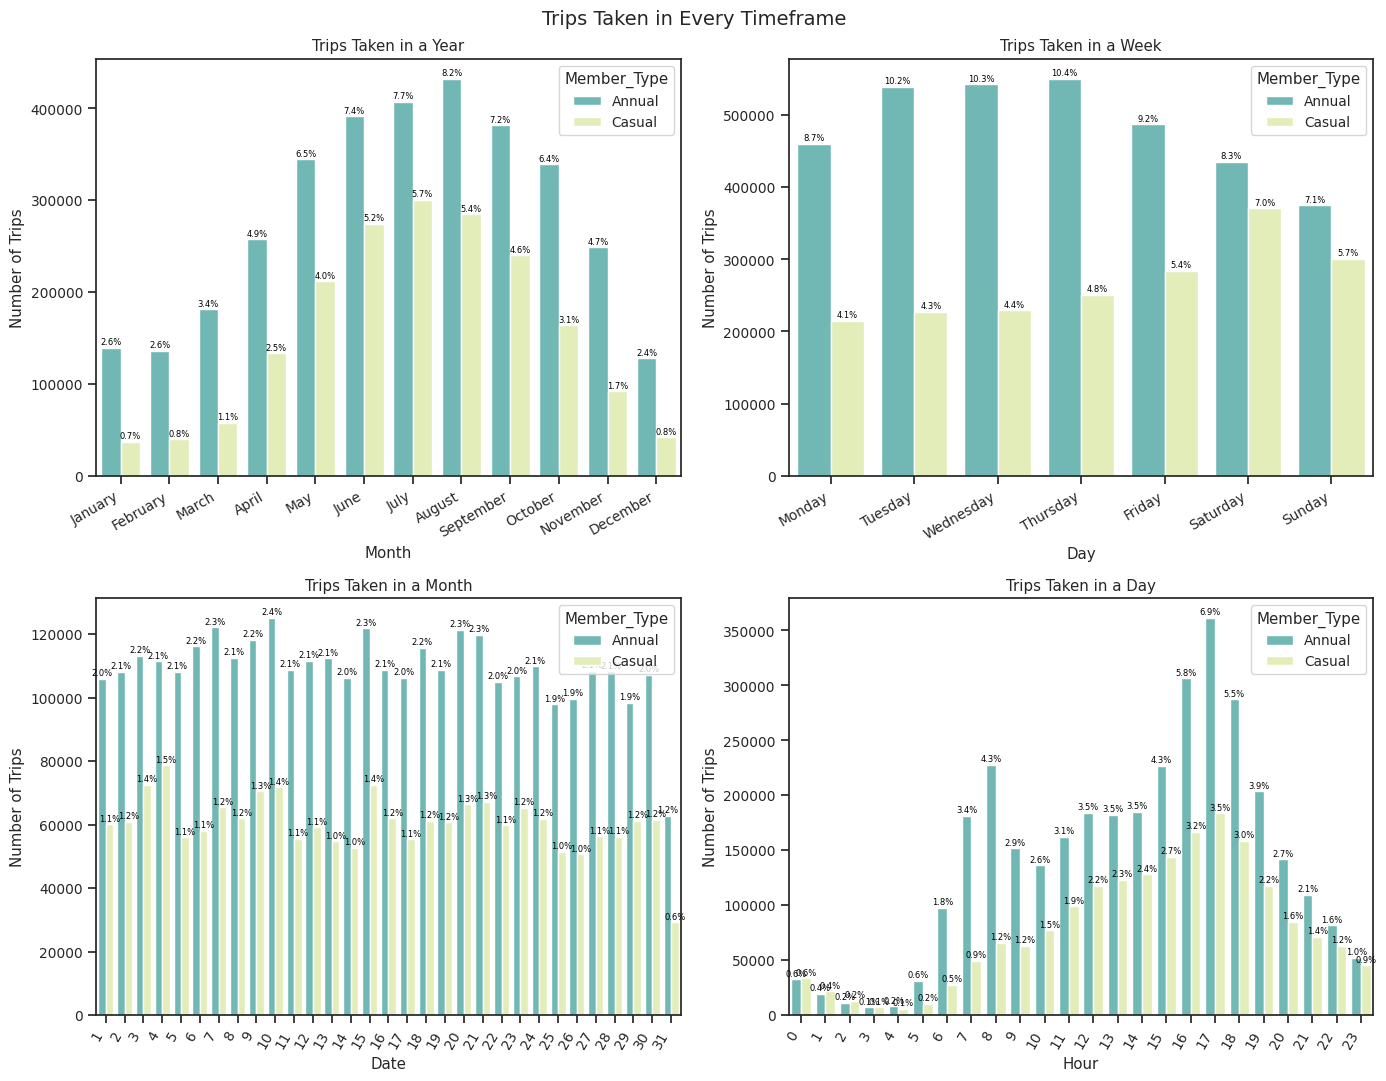

In [45]:
# Define the data and corresponding labels
data = {
    (0, 0): {'x': 'Started_Datetime', 'y': 'Ride_ID', 'hue': 'Member_Type', 'title': 'Trips Taken in a Year', 'xlabel': 'Month', 'xticklabels': month_names, 'xtickrotation': 30, 'data': monthly_counts},
    (0, 1): {'x': 'Day_Of_Week', 'y': 'Ride_ID', 'hue': 'Member_Type', 'title': 'Trips Taken in a Week', 'xlabel': 'Day', 'xticklabels': week_order, 'xtickrotation': 30, 'data': week_counts},
    (1, 0): {'x': 'Started_Datetime', 'y': 'Ride_ID', 'hue': 'Member_Type', 'title': 'Trips Taken in a Month', 'xlabel': 'Date', 'xticklabels': days_order, 'xtickrotation': 60, 'data': day_counts},
    (1, 1): {'x': 'Started_Datetime', 'y': 'Ride_ID', 'hue': 'Member_Type', 'title': 'Trips Taken in a Day', 'xlabel': 'Hour', 'xticklabels': hours_order, 'xtickrotation': 60, 'data': hour_counts}
}

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 11), sharey=False)

# Iterate over the data and axes to plot barplots
for (i, j), plot_data in data.items():
    sns.barplot(x=plot_data['x'], y=plot_data['y'], hue=plot_data['hue'], data=plot_data['data'], palette=custom_palette, ax=axes[i, j])
    axes[i, j].set_title(plot_data['title'])
    axes[i, j].set_xlabel(plot_data['xlabel'])
    axes[i, j].set_ylabel('Number of Trips')
    axes[i, j].set_xticklabels(labels=plot_data['xticklabels'], rotation=plot_data['xtickrotation'], ha='right')
    
    total_counts = sum([p.get_height() for p in axes[i, j].patches])

    for p in axes[i, j].patches:
        axes[i, j].annotate('{:.1f}%'.format(p.get_height() / total_counts * 100),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='bottom', fontsize=6, color='black', xytext=(0, 1),
                            textcoords='offset points')
        
plt.suptitle("Trips Taken in Every Timeframe", fontsize=14)

plt.tight_layout()
plt.show()


In [46]:
monthly_counts

,Started_Datetime,Member_Type,Ride_ID
0,1,Annual,139199
1,1,Casual,37306
2,2,Annual,136371
3,2,Casual,39948
4,3,Annual,181196
5,3,Casual,57683
6,4,Annual,257648
7,4,Casual,133317
8,5,Annual,344603
9,5,Casual,211767


In [47]:
week_counts

,Day_Of_Week,Member_Type,Ride_ID
0,Monday,Annual,460234
1,Monday,Casual,214356
2,Tuesday,Annual,538419
3,Tuesday,Casual,227448
4,Wednesday,Annual,542380
5,Wednesday,Casual,229532
6,Thursday,Annual,549874
7,Thursday,Casual,250634
8,Friday,Annual,486655
9,Friday,Casual,284215


In [48]:
hour_counts

,Started_Datetime,Member_Type,Ride_ID
0,0,Annual,32673
1,0,Casual,33500
2,1,Annual,19322
3,1,Casual,21724
4,2,Annual,11231
5,2,Casual,13122
6,3,Annual,7267
7,3,Casual,7260
8,4,Annual,7924
9,4,Casual,5511


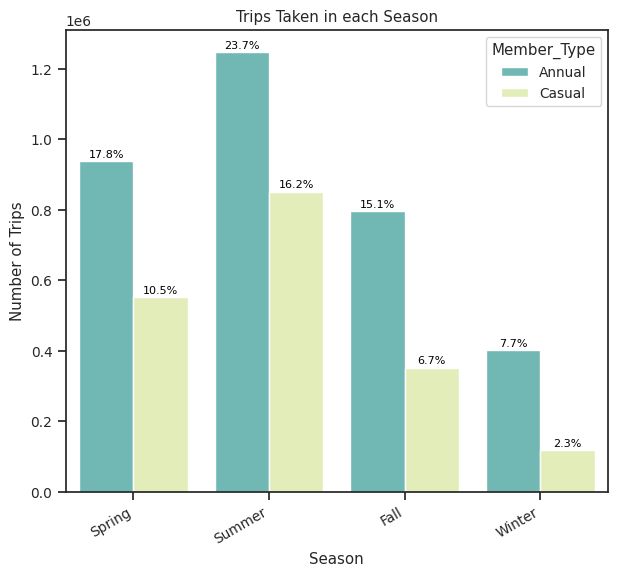

In [49]:
plt.figure(figsize=(7,6))

sns.barplot(x='Season', y='Ride_ID', hue='Member_Type', data=season_counts, palette=custom_palette)
plt.title('Trips Taken in each Season')
plt.xlabel("Season")
plt.ylabel('Number of Trips')
plt.xticks(ticks=range(len(season_order)), labels=season_order, rotation=30, ha='right')
total_counts = sum([p.get_height() for p in plt.gca().patches])
for p in plt.gca().patches:
    plt.annotate('{:.1f}%'.format(p.get_height() / total_counts * 100),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 1),
                 textcoords='offset points')
plt.show()

In [50]:
annual_pivot_month = pd.pivot_table(annual_members, index=months, columns=hours, values='Ride_ID',  aggfunc='count', fill_value=0, dropna=False)
annual_pivot_month.index = month_names
annual_pivot_month.columns = hours_order

annual_pivot_week = pd.pivot_table(annual_members, index='Day_Of_Week', columns=hours, values='Ride_ID',  aggfunc='count', fill_value=0, dropna=False)
annual_pivot_week.index = week_order
annual_pivot_week.columns = hours_order

annual_pivot_day = pd.pivot_table(annual_members, index=days, columns=hours, values='Ride_ID',  aggfunc='count', fill_value=0, dropna=False)
annual_pivot_day.index = days_order
annual_pivot_day.columns = hours_order

annual_pivot_season = pd.pivot_table(annual_members, index='Season', columns=hours, values='Ride_ID',  aggfunc='count', fill_value=0, dropna=False)
annual_pivot_season.index = season_order
annual_pivot_season.columns = hours_order

In [51]:
casual_pivot_month = pd.pivot_table(casual_members, index=months, columns=hours, values='Ride_ID',  aggfunc='count', fill_value=0, dropna=False)
casual_pivot_month.index = month_names
casual_pivot_month.columns = hours_order

casual_pivot_week = pd.pivot_table(casual_members, index='Day_Of_Week', columns=hours, values='Ride_ID',  aggfunc='count', fill_value=0, dropna=False)
casual_pivot_week.index = week_order
casual_pivot_week.columns = hours_order

casual_pivot_day = pd.pivot_table(casual_members, index=days, columns=hours, values='Ride_ID',  aggfunc='count', fill_value=0, dropna=False)
casual_pivot_day.index = days_order
casual_pivot_day.columns = hours_order

casual_pivot_season = pd.pivot_table(casual_members, index='Season', columns=hours, values='Ride_ID',  aggfunc='count', fill_value=0, dropna=False)
casual_pivot_season.index = season_order
casual_pivot_season.columns = hours_order

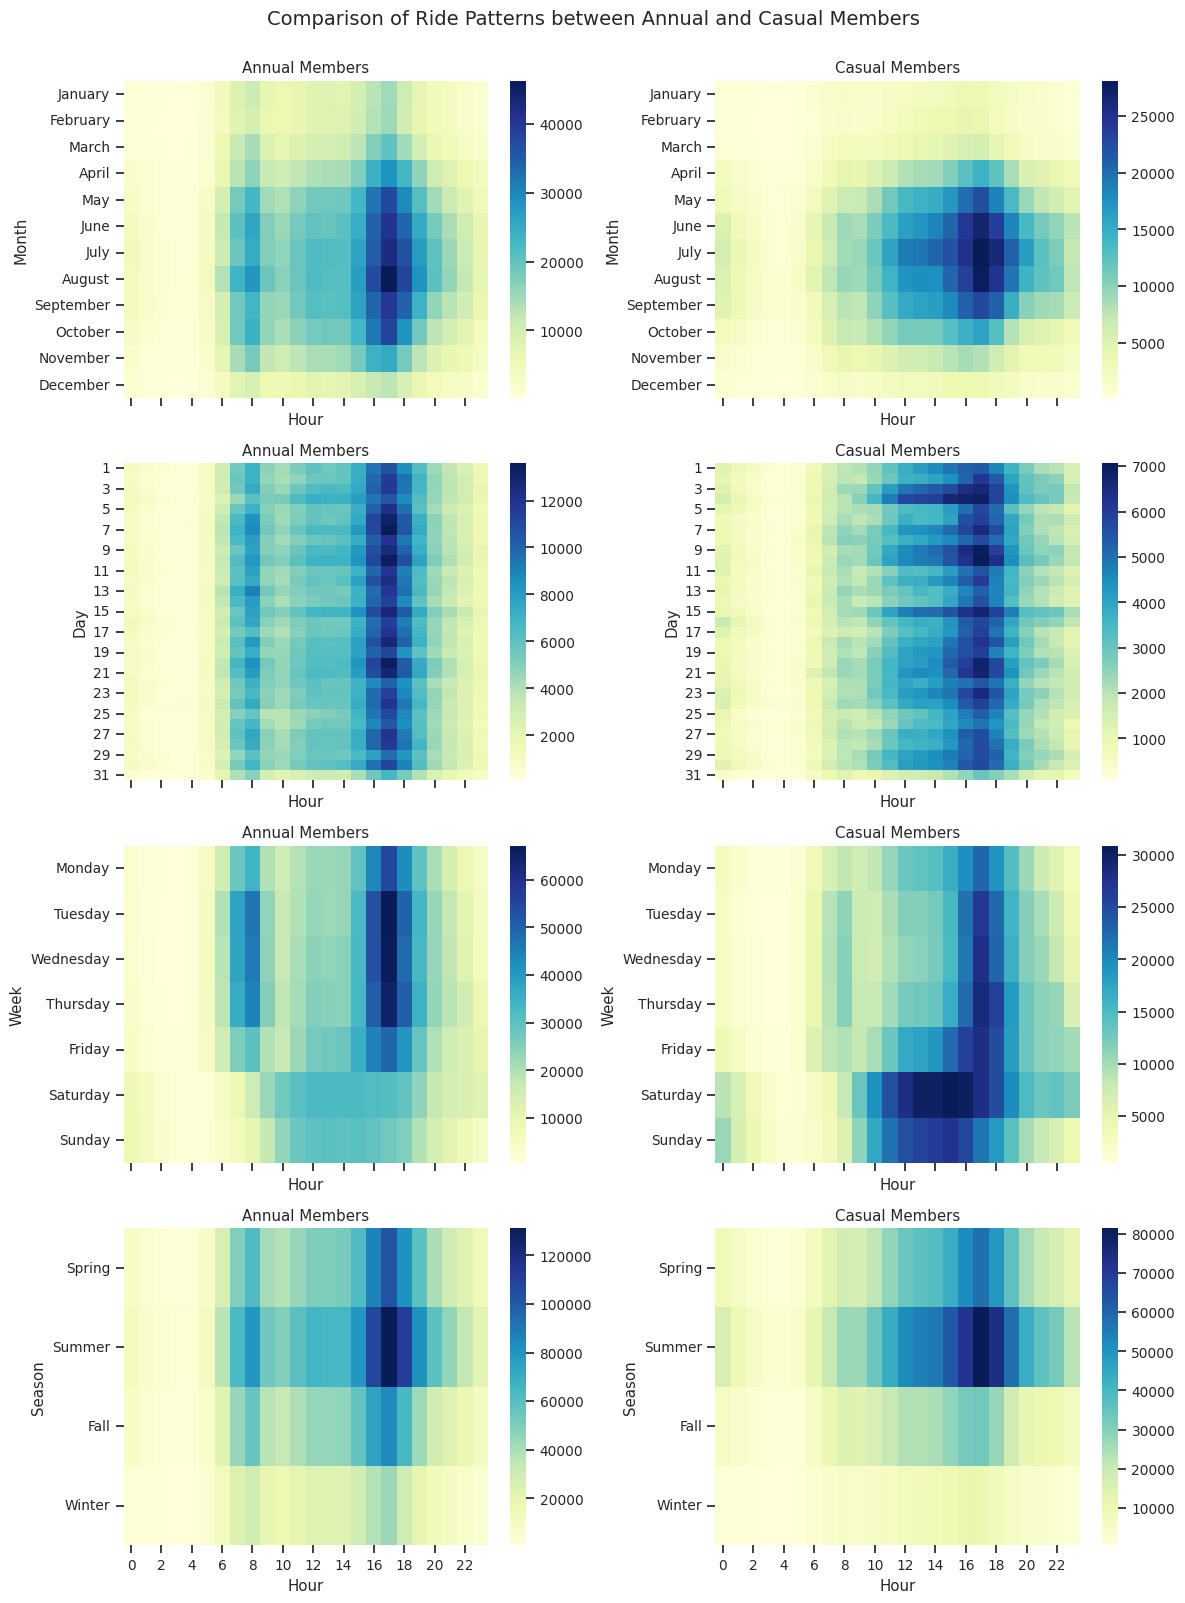

In [52]:
data = {
    'Annual Members': {
        'Month': annual_pivot_month,
        'Day': annual_pivot_day,
        'Week': annual_pivot_week,
        'Season': annual_pivot_season
    },
    'Casual Members': {
        'Month': casual_pivot_month,
        'Day': casual_pivot_day,
        'Week': casual_pivot_week,
        'Season': casual_pivot_season
    }
}

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16), sharex=True)

# Iterate over data and axes to plot heatmaps
for i, (member_type, pivot_tables) in enumerate(data.items()):
    for j, (time_period, pivot_table) in enumerate(pivot_tables.items()):
        sns.heatmap(pivot_table, cmap='YlGnBu', fmt='g', cbar=True, ax=axes[j, i])
        axes[j, i].set_xlabel('Hour')
        axes[j, i].set_ylabel(time_period)

        # Set title for each column
        axes[j, i].set_title(member_type)

# Set the overarching title for the entire subplot
suptitle = plt.suptitle("Comparison of Ride Patterns between Annual and Casual Members", fontsize=14)
suptitle.set_y(1)

# Rotate the y-tick labels for axes[3, 0] and axes[3, 1]
axes[3, 0].set_yticklabels(axes[3, 0].get_yticklabels(), rotation=0)
axes[3, 1].set_yticklabels(axes[3, 1].get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

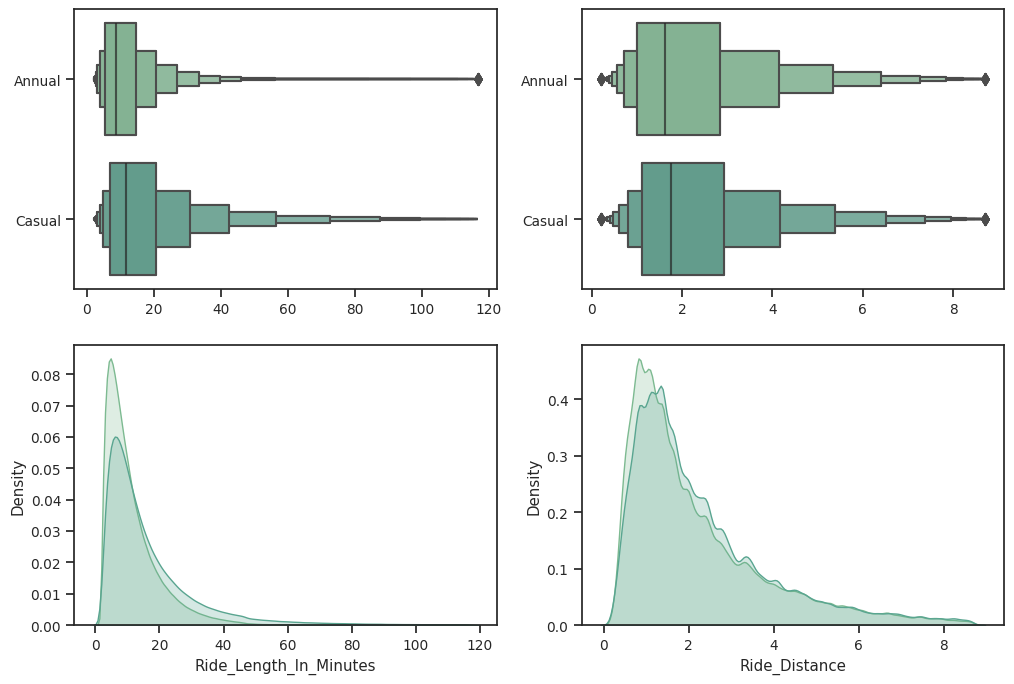

In [53]:
fig, (ax1,ax2) = plt.subplots(2,2,figsize=(12,8))
for i, var in enumerate(['Ride_Length_In_Minutes', 'Ride_Distance']):
    for j, user in enumerate(df['Member_Type'].unique()):
        sns.kdeplot(df[df['Member_Type'] == user][var], ax=ax2[i], shade=True, label=user)
        sns.boxenplot(x=var, y="Member_Type", data=df, ax=ax1[i])
        ax1[i].set(xlabel="", ylabel="")
        ax2[i].set(ylabel="Density")
plt.show()

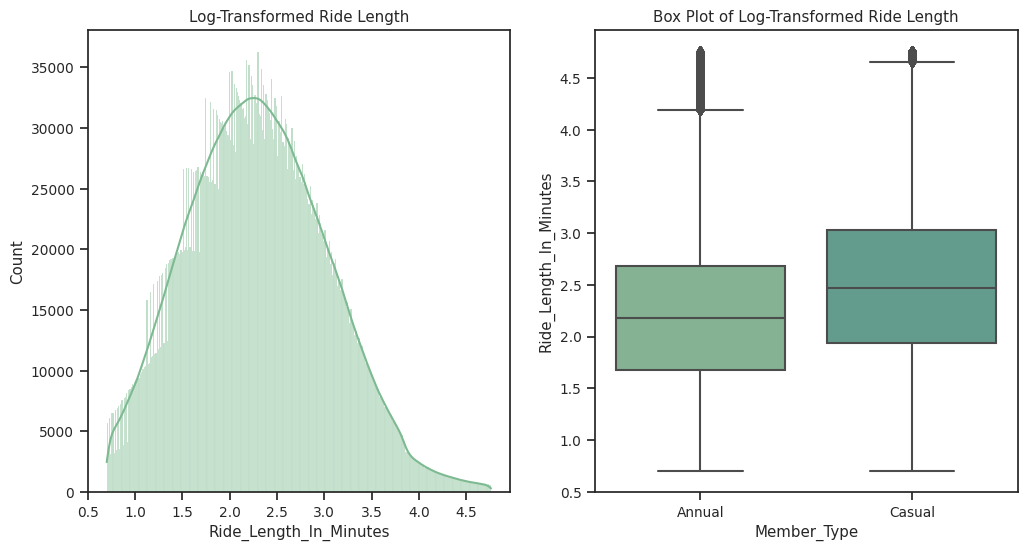

In [54]:
Log_Ride_Length = np.log(df['Ride_Length_In_Minutes'])

# Visualize the transformed data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of log-transformed data
sns.histplot(Log_Ride_Length, ax=ax1, kde=True)
ax1.set(title='Log-Transformed Ride Length')

# Box plot of log-transformed data
sns.boxplot(y=Log_Ride_Length, x='Member_Type', data=df, ax=ax2)
ax2.set(title='Box Plot of Log-Transformed Ride Length')

plt.show()

In [55]:
monthly_min_dist = df.groupby([months, "Member_Type"]).agg({'Ride_Length_In_Minutes': ['sum', 'median'],'Ride_Distance': ['sum', 'median']}).reset_index()
week_min_dist = df.groupby(["Day_Of_Week","Member_Type"]).agg({'Ride_Length_In_Minutes': ['sum', 'median'],'Ride_Distance': ['sum', 'median']}).reset_index()
hour_min_dist = df.groupby([df["Started_Datetime"].dt.hour,"Member_Type"]).agg({'Ride_Length_In_Minutes': ['sum', 'median'],'Ride_Distance': ['sum', 'median']}).reset_index()
season_min_dist = df.groupby(["Season","Member_Type"]).agg({'Ride_Length_In_Minutes': ['sum', 'median'],'Ride_Distance': ['sum', 'median']}).reset_index()

In [56]:
df.groupby("Member_Type").agg({'Ride_Length_In_Minutes': ['sum', 'median'],'Ride_Distance': ['sum', 'median']})

Ride_Length_In_Minutes            Ride_Distance          
                               sum     median           sum    median
Member_Type                                                          
Annual                  38979788.0   8.816667  7.322086e+06  1.621866
Casual                  31323674.0  11.800000  4.254906e+06  1.763715

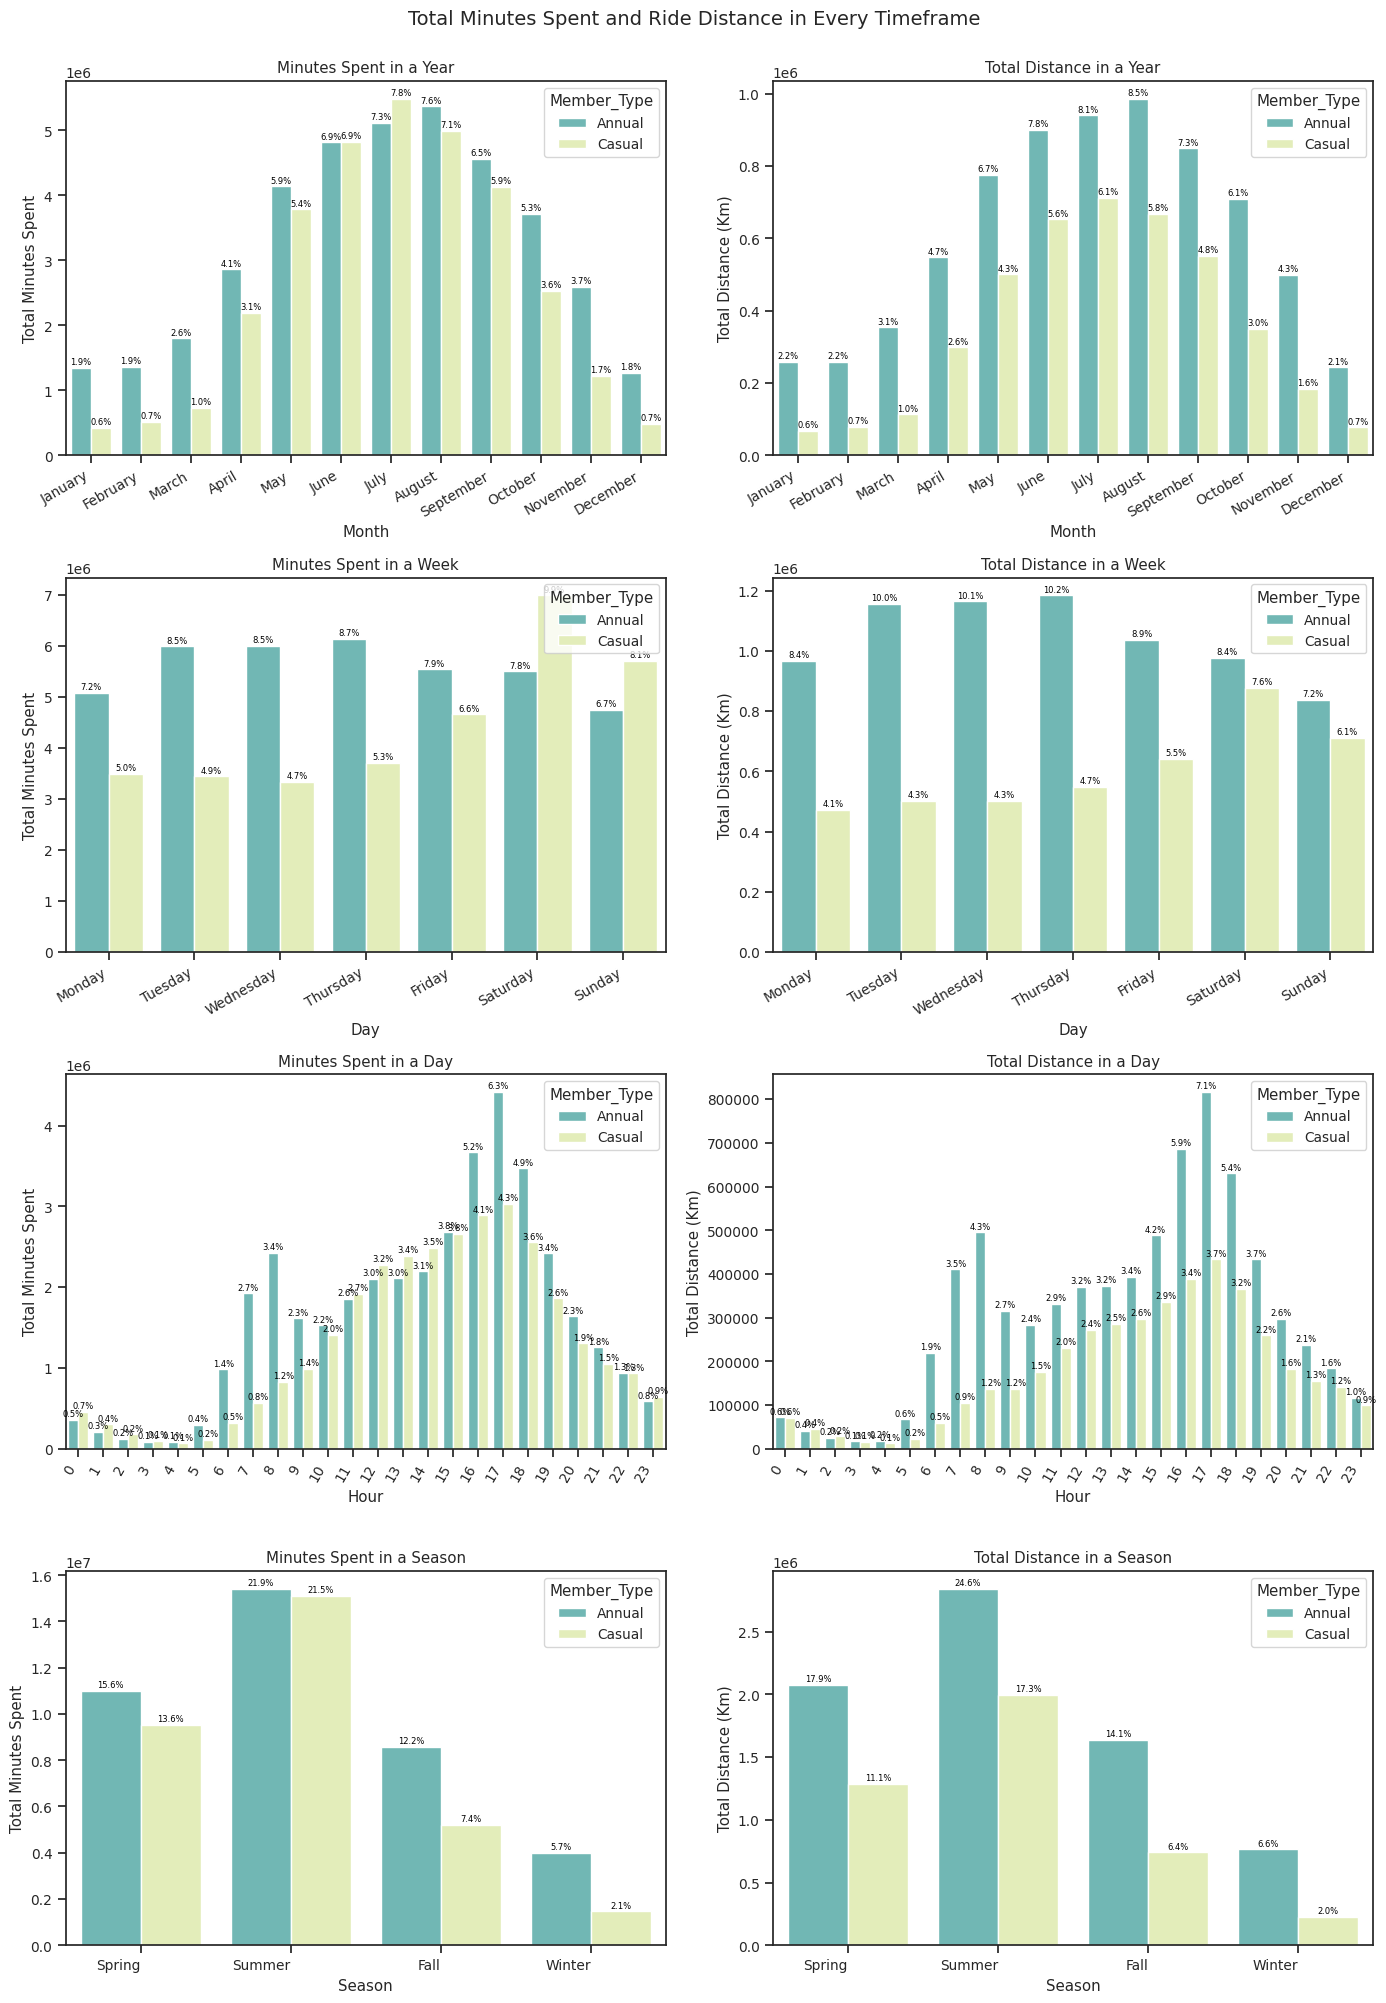

In [57]:
# Define the data and corresponding labels
data = {
    (0,0): {'x': 'Started_Datetime', 'y': ('Ride_Length_In_Minutes', 'sum'), 'hue': 'Member_Type', 'title': 'Minutes Spent in a Year', 'xlabel': 'Month', 'xticklabels': month_names, 'xtickrotation': 30, 'data': monthly_min_dist},
    (1,0): {'x': 'Day_Of_Week', 'y': ('Ride_Length_In_Minutes', 'sum'), 'hue': 'Member_Type', 'title': 'Minutes Spent in a Week', 'xlabel': 'Day', 'xticklabels': week_order, 'xtickrotation': 30, 'data': week_min_dist},
    (2,0): {'x': 'Started_Datetime', 'y': ('Ride_Length_In_Minutes', 'sum'), 'hue': 'Member_Type', 'title': 'Minutes Spent in a Day', 'xlabel': 'Hour', 'xticklabels': hours_order, 'xtickrotation': 60, 'data': hour_min_dist},
    (3,0): {'x': 'Season', 'y': ('Ride_Length_In_Minutes', 'sum'), 'hue': 'Member_Type', 'title': 'Minutes Spent in a Season', 'xlabel': 'Season', 'xticklabels': season_order, 'xtickrotation': 0, 'data': season_min_dist},
    (0,1): {'x': 'Started_Datetime', 'y': ('Ride_Distance', 'sum'), 'hue': 'Member_Type', 'title': 'Total Distance in a Year', 'xlabel': 'Month', 'xticklabels': month_names, 'xtickrotation': 30, 'data': monthly_min_dist},
    (1,1): {'x': 'Day_Of_Week', 'y': ('Ride_Distance', 'sum'), 'hue': 'Member_Type', 'title': 'Total Distance in a Week', 'xlabel': 'Day', 'xticklabels': week_order, 'xtickrotation': 30, 'data': week_min_dist},
    (2,1): {'x': 'Started_Datetime', 'y': ('Ride_Distance', 'sum'), 'hue': 'Member_Type', 'title': 'Total Distance in a Day', 'xlabel': 'Hour', 'xticklabels': hours_order, 'xtickrotation': 60, 'data': hour_min_dist},
    (3,1): {'x': 'Season', 'y': ('Ride_Distance', 'sum'), 'hue': 'Member_Type', 'title': 'Total Distance in a Season', 'xlabel': 'Season', 'xticklabels': season_order, 'xtickrotation': 0, 'data': season_min_dist}
}

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(14, 20), sharey=False)

# Iterate over the data and axes to plot barplots
for (i, j), plot_data in data.items():
    sns.barplot(x=plot_data['x'], y=plot_data['data'][plot_data['y']], hue=plot_data['hue'], data=plot_data['data'], palette=custom_palette, ax=axes[i, j])
    axes[i, j].set_title(plot_data['title'])
    axes[i, j].set_xlabel(plot_data['xlabel'])
    axes[i, j].set_ylabel('Total Minutes Spent' if j == 0 else 'Total Distance (Km)')
    axes[i, j].set_xticklabels(labels=plot_data['xticklabels'], rotation=plot_data['xtickrotation'], ha='right')
    
    total_counts = sum([p.get_height() for p in axes[i, j].patches])

    for p in axes[i, j].patches:
        axes[i, j].annotate('{:.1f}%'.format(p.get_height() / total_counts * 100),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='bottom', fontsize=6, color='black', xytext=(0, 1),
                            textcoords='offset points')
# Set the overarching title for the entire subplot
suptitle = plt.suptitle("Total Minutes Spent and Ride Distance in Every Timeframe", fontsize=14)
suptitle.set_y(1)
plt.tight_layout()
plt.show()

In [58]:
monthly_min_dist

Started_Datetime Member_Type Ride_Length_In_Minutes             \
                                                   sum     median   
0                 1      Annual           1.346487e+06   7.316667   
1                 1      Casual           4.202208e+05   7.983333   
2                 2      Annual           1.364745e+06   7.466667   
3                 2      Casual           5.184432e+05   8.833333   
4                 3      Annual           1.803472e+06   7.550000   
5                 3      Casual           7.311386e+05   8.866667   
6                 4      Annual           2.862532e+06   8.383333   
7                 4      Casual           2.190245e+06  11.300000   
8                 5      Annual           4.142019e+06   9.233334   
9                 5      Casual           3.785345e+06  12.700000   
10                6      Annual           4.817468e+06   9.616667   
11                6      Casual           4.823436e+06  12.833333   
12                7      Annual           5.120655e+06   9.783334   
13                7      Casual           5.487879e+06  13.233334   
14                8      Annual           5.371672e+06   9.716666   
15                8      Casual           4.996010e+06  12.750000   
16                9      Annual           4.568165e+06   9.283334   
17                9      Casual           4.134250e+06  12.183333   
18               10      Annual           3.721200e+06   8.450000   
19               10      Casual           2.527652e+06  10.600000   
20               11      Annual           2.591008e+06   7.983333   
21               11      Casual           1.227916e+06   9.266666   
22               12      Annual           1.270366e+06   7.550000   
23               12      Casual           4.811367e+05   8.316667   

    Ride_Distance            
              sum    median  
0   258946.862265  1.376463  
1    68296.481600  1.394815  
2   258981.346758  1.386655  
3    78258.867610  1.495837  
4   354114.671389  1.446055  
5   113062.735339  1.528491  
6   547810.996370  1.590950  
7   298441.913357  1.718043  
8   775817.258771  1.702567  
9   500934.546605  1.860126  
10  900221.001348  1.771550  
11  652812.413452  1.898719  
12  939773.433151  1.773648  
13  711332.702108  1.879089  
14  985799.096495  1.732837  
15  667692.862066  1.849359  
16  848401.286138  1.668768  
17  552179.141340  1.800424  
18  709793.815807  1.553300  
19  349869.396782  1.654238  
20  498564.846895  1.476768  
21  184046.862076  1.534272  
22  243861.081018  1.403815  
23   77978.043307  1.454654

In [59]:
week_min_dist

Day_Of_Week Member_Type Ride_Length_In_Minutes            Ride_Distance  \
                                              sum     median           sum   
0       Monday      Annual             5073255.50   8.400000  9.668910e+05   
1       Monday      Casual             3491589.00  11.200000  4.722440e+05   
2      Tuesday      Annual             5989618.00   8.600000  1.156605e+06   
3      Tuesday      Casual             3442851.00  10.633333  5.016415e+05   
4    Wednesday      Annual             6000487.50   8.633333  1.164902e+06   
5    Wednesday      Casual             3338993.50  10.416667  5.022051e+05   
6     Thursday      Annual             6132301.50   8.666667  1.184088e+06   
7     Thursday      Casual             3705222.75  10.600000  5.494042e+05   
8       Friday      Annual             5540266.00   8.716666  1.035743e+06   
9       Friday      Casual             4656439.00  11.650000  6.416745e+05   
10    Saturday      Annual             5501279.50   9.616667  9.761465e+05   
11    Saturday      Casual             6986579.00  13.716666  8.774170e+05   
12      Sunday      Annual             4742581.00   9.483334  8.377108e+05   
13      Sunday      Casual             5701999.50  13.666667  7.103198e+05   

              
      median  
0   1.567177  
1   1.692391  
2   1.601410  
3   1.702998  
4   1.611826  
5   1.696752  
6   1.608881  
7   1.700921  
8   1.597305  
9   1.751349  
10  1.708944  
11  1.876796  
12  1.692391  
13  1.864821

In [60]:
hour_min_dist

Started_Datetime Member_Type Ride_Length_In_Minutes             \
                                                   sum     median   
0                 0      Annual           3.543658e+05   8.266666   
1                 0      Casual           4.573677e+05   9.650000   
2                 1      Annual           2.114669e+05   8.183333   
3                 1      Casual           2.989839e+05   9.600000   
4                 2      Annual           1.237767e+05   8.150000   
5                 2      Casual           1.752695e+05   9.533334   
6                 3      Annual           8.181022e+04   8.183333   
7                 3      Casual           9.559203e+04   9.283334   
8                 4      Annual           8.537137e+04   7.833333   
9                 4      Casual           6.731650e+04   8.850000   
10                5      Annual           2.964429e+05   7.183333   
11                5      Casual           1.116194e+05   7.650000   
12                6      Annual           9.830537e+05   7.933333   
13                6      Casual           3.204938e+05   7.966667   
14                7      Annual           1.923493e+06   8.516666   
15                7      Casual           5.707056e+05   8.483334   
16                8      Annual           2.424757e+06   8.550000   
17                8      Casual           8.279448e+05   8.950000   
18                9      Annual           1.614840e+06   8.100000   
19                9      Casual           9.879328e+05  10.233334   
20               10      Annual           1.527709e+06   8.333333   
21               10      Casual           1.412229e+06  12.116667   
22               11      Annual           1.856971e+06   8.383333   
23               11      Casual           1.918048e+06  13.250000   
24               12      Annual           2.106238e+06   8.316667   
25               12      Casual           2.279171e+06  13.466666   
26               13      Annual           2.108054e+06   8.466666   
27               13      Casual           2.388874e+06  13.766666   
28               14      Annual           2.197544e+06   8.833333   
29               14      Casual           2.488549e+06  13.833333   
30               15      Annual           2.687759e+06   8.983334   
31               15      Casual           2.657811e+06  13.283334   
32               16      Annual           3.669904e+06   9.383333   
33               16      Casual           2.887831e+06  12.566667   
34               17      Annual           4.415754e+06   9.633333   
35               17      Casual           3.029147e+06  12.366667   
36               18      Annual           3.472912e+06   9.400000   
37               18      Casual           2.557332e+06  12.016666   
38               19      Annual           2.417873e+06   9.100000   
39               19      Casual           1.860302e+06  11.650000   
40               20      Annual           1.639958e+06   8.883333   
41               20      Casual           1.303183e+06  11.283334   
42               21      Annual           1.252308e+06   8.866667   
43               21      Casual           1.052580e+06  10.950000   
44               22      Annual           9.410204e+05   9.066667   
45               22      Casual           9.323302e+05  11.000000   
46               23      Annual           5.864075e+05   8.616667   
47               23      Casual           6.430587e+05  10.466666   

    Ride_Distance            
              sum    median  
0    71264.232957  1.655016  
1    69977.552299  1.629187  
2    41160.533875  1.622634  
3    45854.261405  1.647403  
4    24327.325897  1.639337  
5    28596.193114  1.682289  
6    16376.268998  1.667376  
7    15953.914801  1.691530  
8    18544.740982  1.687719  
9    12586.082160  1.743541  
10   67464.542669  1.605710  
11   21830.664820  1.650648  
12  219735.016455  1.734380  
13   58661.108423  1.622677  
14  410193.352863  1.694345  
15  104426.686257  1.630182  
16  495126.7

In [61]:
season_min_dist

Season Member_Type Ride_Length_In_Minutes            Ride_Distance  \
                                         sum     median           sum   
0  Spring      Annual             10995433.0   8.950000  2.077086e+06   
1  Spring      Casual              9535146.0  12.250000  1.286305e+06   
2  Summer      Annual             15417868.0   9.616667  2.842691e+06   
3  Summer      Casual             15101002.0  12.800000  1.999088e+06   
4    Fall      Annual              8570407.0   8.250000  1.637338e+06   
5    Fall      Casual              5218001.0  10.166667  7.415578e+05   
6  Winter      Annual              3996080.5   7.450000  7.649702e+05   
7  Winter      Casual              1469525.0   8.583333  2.279547e+05   

             
     median  
0  1.661494  
1  1.827957  
2  1.732893  
3  1.851816  
4  1.519382  
5  1.621646  
6  1.386965  
7  1.472984

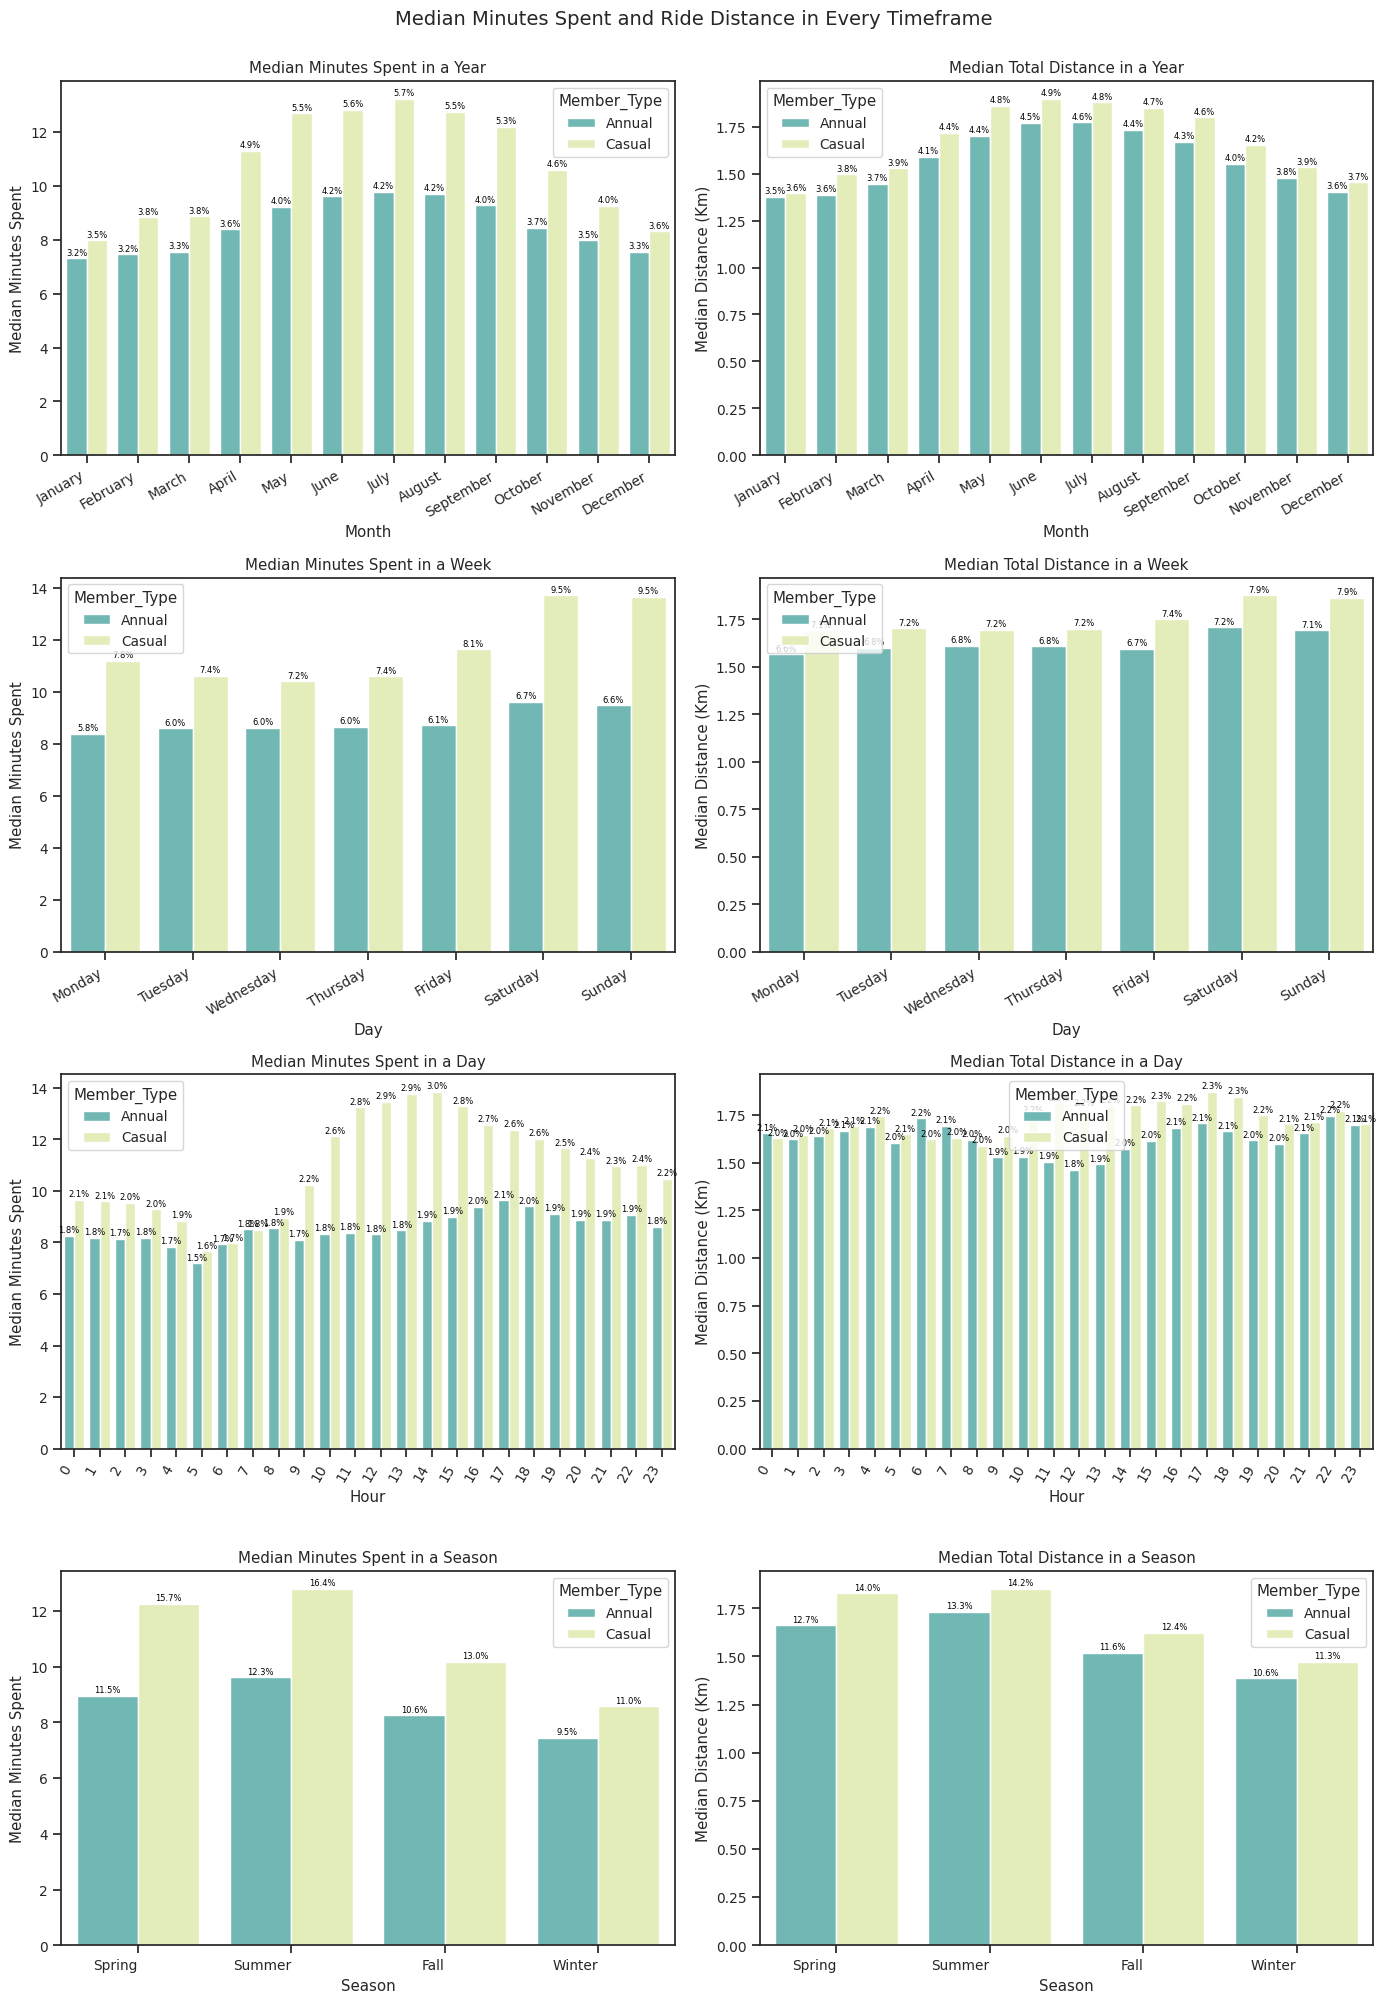

In [62]:
# Define the data and corresponding labels
data = {
    (0,0): {'x': 'Started_Datetime', 'y': ('Ride_Length_In_Minutes', 'median'), 'hue': 'Member_Type', 'title': 'Median Minutes Spent in a Year', 'xlabel': 'Month', 'xticklabels': month_names, 'xtickrotation': 30, 'data': monthly_min_dist},
    (1,0): {'x': 'Day_Of_Week', 'y': ('Ride_Length_In_Minutes', 'median'), 'hue': 'Member_Type', 'title': 'Median Minutes Spent in a Week', 'xlabel': 'Day', 'xticklabels': week_order, 'xtickrotation': 30, 'data': week_min_dist},
    (2,0): {'x': 'Started_Datetime', 'y': ('Ride_Length_In_Minutes', 'median'), 'hue': 'Member_Type', 'title': 'Median Minutes Spent in a Day', 'xlabel': 'Hour', 'xticklabels': hours_order, 'xtickrotation': 60, 'data': hour_min_dist},
    (3,0): {'x': 'Season', 'y': ('Ride_Length_In_Minutes', 'median'), 'hue': 'Member_Type', 'title': 'Median Minutes Spent in a Season', 'xlabel': 'Season', 'xticklabels': season_order, 'xtickrotation': 0, 'data': season_min_dist},
    (0,1): {'x': 'Started_Datetime', 'y': ('Ride_Distance', 'median'), 'hue': 'Member_Type', 'title': 'Median Total Distance in a Year', 'xlabel': 'Month', 'xticklabels': month_names, 'xtickrotation': 30, 'data': monthly_min_dist},
    (1,1): {'x': 'Day_Of_Week', 'y': ('Ride_Distance', 'median'), 'hue': 'Member_Type', 'title': 'Median Total Distance in a Week', 'xlabel': 'Day', 'xticklabels': week_order, 'xtickrotation': 30, 'data': week_min_dist},
    (2,1): {'x': 'Started_Datetime', 'y': ('Ride_Distance', 'median'), 'hue': 'Member_Type', 'title': 'Median Total Distance in a Day', 'xlabel': 'Hour', 'xticklabels': hours_order, 'xtickrotation': 60, 'data': hour_min_dist},
    (3,1): {'x': 'Season', 'y': ('Ride_Distance', 'median'), 'hue': 'Member_Type', 'title': 'Median Total Distance in a Season', 'xlabel': 'Season', 'xticklabels': season_order, 'xtickrotation': 0, 'data': season_min_dist}
}

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(14, 20), sharey=False)

# Iterate over the data and axes to plot barplots
for (i, j), plot_data in data.items():
    sns.barplot(x=plot_data['x'], y=plot_data['data'][plot_data['y']], hue=plot_data['hue'], data=plot_data['data'], palette=custom_palette, ax=axes[i, j])
    axes[i, j].set_title(plot_data['title'])
    axes[i, j].set_xlabel(plot_data['xlabel'])
    axes[i, j].set_ylabel('Median Minutes Spent' if j == 0 else 'Median Distance (Km)')
    axes[i, j].set_xticklabels(labels=plot_data['xticklabels'], rotation=plot_data['xtickrotation'], ha='right')
    
    total_counts = sum([p.get_height() for p in axes[i, j].patches])

    for p in axes[i, j].patches:
        axes[i, j].annotate('{:.1f}%'.format(p.get_height() / total_counts * 100),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='bottom', fontsize=6, color='black', xytext=(0, 1),
                            textcoords='offset points')

# Set the overarching title for the entire subplot
suptitle = plt.suptitle("Median Minutes Spent and Ride Distance in Every Timeframe", fontsize=14)
suptitle.set_y(1)
plt.tight_layout()
plt.show()

In [63]:
annual_start_station = annual_members.groupby(['Start_Station_Name','Start_Latitude','Start_Longitude'])['Ride_ID'].count().reset_index().rename(columns={"Ride_ID":"Number of Trips"}).sort_values("Number of Trips",ascending=False)
casual_start_station = casual_members.groupby(['Start_Station_Name','Start_Latitude','Start_Longitude'])['Ride_ID'].count().reset_index().rename(columns={"Ride_ID":"Number of Trips"}).sort_values("Number of Trips",ascending=False)

In [64]:
annual_start_station

,Start_Station_Name,Start_Latitude,Start_Longitude,Number of Trips
201749,Clark St & Elm St,41.902973,-87.631280,15569
577567,Kingsbury St & Kinzie St,41.889177,-87.638506,14878
1044865,University Ave & 57th St,41.791478,-87.599861,14054
512,53 Te'Jay's Adult Books,41.890000,-87.630000,13773
414515,Ellis Ave & 60th St,41.785097,-87.601073,13490
...,...,...,...,...
394085,DuSable Lake Shore Dr & North Blvd,41.911749,-87.626850,1
394086,DuSable Lake Shore Dr & North Blvd,41.911749,-87.626821,1
394087,DuSable Lake Shore Dr & North Blvd,41.911749,-87.626801,1
394088,DuSable Lake Shore Dr & North Blvd,41.911749,-87.626779,1


In [65]:
casual_start_station

,Start_Station_Name,Start_Latitude,Start_Longitude,Number of Trips
626961,Streeter Dr & Grand Ave,41.892278,-87.612043,28858
232388,DuSable Lake Shore Dr & Monroe St,41.880958,-87.616743,18975
240809,DuSable Lake Shore Dr & North Blvd,41.911722,-87.626804,12750
431840,Michigan Ave & Oak St,41.900960,-87.623777,11587
636850,Theater on the Lake,41.926277,-87.630834,10401
...,...,...,...,...
240297,DuSable Lake Shore Dr & North Blvd,41.911712,-87.626805,1
240298,DuSable Lake Shore Dr & North Blvd,41.911712,-87.626788,1
240299,DuSable Lake Shore Dr & North Blvd,41.911712,-87.626726,1
240300,DuSable Lake Shore Dr & North Blvd,41.911712,-87.626845,1


In [66]:
top10_annual = annual_start_station.nlargest(10, 'Number of Trips')
top10_casual = casual_start_station.nlargest(10, 'Number of Trips')

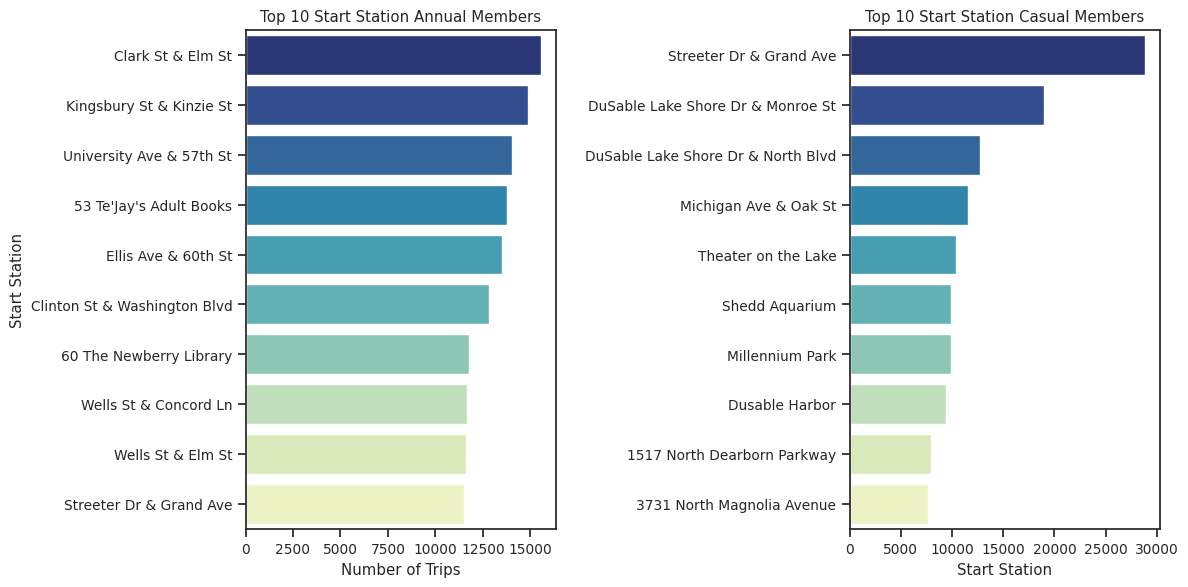

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

sns.barplot(x='Number of Trips', y='Start_Station_Name', data=top10_annual, ax=axes[0], palette='YlGnBu_r')
axes[0].set_title('Top 10 Start Station Annual Members')
axes[0].set_xlabel('Number of Trips')
axes[0].set_ylabel('Start Station')

sns.barplot(x='Number of Trips', y='Start_Station_Name', data=top10_casual, ax=axes[1], palette='YlGnBu_r')
axes[1].set_title('Top 10 Start Station Casual Members')
axes[1].set_xlabel('Start Station')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [68]:
no_round_trip = df[(df['Start_Latitude']!=df['End_Latitude']) & (df['Start_Longitude']!=df['End_Longitude'])]
routes = df['Start_Station_Name'] + " - " + df['End_Station_Name']
no_round_trip_routes = no_round_trip['Start_Station_Name'] + " - " + no_round_trip['End_Station_Name']

column_list = ['Start_Station_Name', 'End_Station_Name', 'Route', 'Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude', 'Distance', 'Number of Trips']
annual_routes = annual_members.groupby([
    annual_members['Start_Station_Name'],
    annual_members['End_Station_Name'],
    routes,
    annual_members['Start_Latitude'],
    annual_members['Start_Longitude'],
    annual_members['End_Latitude'],
    annual_members['End_Longitude']
]).agg({'Ride_Distance': ['median', 'size']}).reset_index()
annual_routes.columns = column_list

annual_nr_routes = annual_members.groupby([
    annual_members['Start_Station_Name'],
    annual_members['End_Station_Name'],
    no_round_trip_routes,
    annual_members['Start_Latitude'],
    annual_members['Start_Longitude'],
    annual_members['End_Latitude'],
    annual_members['End_Longitude']
]).agg({'Ride_Distance': ['max', 'size']}).reset_index()
annual_nr_routes.columns = column_list

casual_routes = casual_members.groupby([
    casual_members['Start_Station_Name'],
    casual_members['End_Station_Name'],
    routes,
    casual_members['Start_Latitude'],
    casual_members['Start_Longitude'],
    casual_members['End_Latitude'],
    casual_members['End_Longitude']
]).agg({'Ride_Distance': ['median', 'size']}).reset_index()
casual_routes.columns = column_list

casual_nr_routes = casual_members.groupby([
    casual_members['Start_Station_Name'],
    casual_members['End_Station_Name'],
    no_round_trip_routes,
    casual_members['Start_Latitude'],
    casual_members['Start_Longitude'],
    casual_members['End_Latitude'],
    casual_members['End_Longitude']
]).agg({'Ride_Distance': ['max', 'size']}).reset_index()
casual_nr_routes.columns = column_list

In [69]:
annual_routes.sort_values('Number of Trips',ascending=False).head()

,Start_Station_Name,End_Station_Name,Route,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Distance,Number of Trips
491085,Ellis Ave & 60th St,University Ave & 57th St,Ellis Ave & 60th St - University Ave & 57th St,41.785097,-87.601073,41.791478,-87.599861,0.716597,4431
489737,Ellis Ave & 60th St,Ellis Ave & 55th St,Ellis Ave & 60th St - Ellis Ave & 55th St,41.785097,-87.601073,41.794301,-87.601450,1.023858,4361
1192541,University Ave & 57th St,Ellis Ave & 60th St,University Ave & 57th St - Ellis Ave & 60th St,41.791478,-87.599861,41.785097,-87.601073,0.716597,4167
486087,Ellis Ave & 55th St,Ellis Ave & 60th St,Ellis Ave & 55th St - Ellis Ave & 60th St,41.794301,-87.601450,41.785097,-87.601073,1.023858,4057
1137265,State St & 33rd St,Calumet Ave & 33rd St,State St & 33rd St - Calumet Ave & 33rd St,41.834734,-87.625813,41.834900,-87.617930,0.653353,3678


In [70]:
casual_routes.sort_values('Number of Trips',ascending=False).head()

,Start_Station_Name,End_Station_Name,Route,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Distance,Number of Trips
301354,DuSable Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,DuSable Lake Shore Dr & Monroe St - Streeter D...,41.880958,-87.616743,41.892278,-87.612043,1.317488,3699
762287,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave - Streeter Dr & Grand Ave,41.892278,-87.612043,41.892278,-87.612043,3.819991,3550
296664,DuSable Lake Shore Dr & Monroe St,DuSable Lake Shore Dr & Monroe St,DuSable Lake Shore Dr & Monroe St - DuSable La...,41.880958,-87.616743,41.880958,-87.616743,4.153776,3089
755399,Streeter Dr & Grand Ave,DuSable Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave - DuSable Lake Shore D...,41.892278,-87.612043,41.880958,-87.616743,1.317488,1815
324568,Ellis Ave & 60th St,Ellis Ave & 55th St,Ellis Ave & 60th St - Ellis Ave & 55th St,41.785097,-87.601073,41.794301,-87.601450,1.023858,1664


In [71]:
annual_nr_routes.sort_values('Distance',ascending=False).head()

,Start_Station_Name,End_Station_Name,Route,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Distance,Number of Trips
860360,Montrose Harbor,Clinton St & Lake St,Montrose Harbor - Clinton St & Lake St,41.963919,-87.638211,41.885637,-87.641823,8.709733,1
1169770,Streeter Dr & Grand Ave,Conservatory Dr & Lake St,Streeter Dr & Grand Ave - Conservatory Dr & La...,41.892278,-87.612043,41.885502,-87.716866,8.709708,1
546163,Glenwood Ave & Morse Ave,Clark St & Drummond Pl,Glenwood Ave & Morse Ave - Clark St & Drummond Pl,42.007959,-87.665624,41.931248,-87.644336,8.709557,1
691941,Lake Park Ave & 53rd St,Michigan Ave & 8th St,Lake Park Ave & 53rd St - Michigan Ave & 8th St,41.799709,-87.586096,41.872773,-87.623981,8.709528,1
1264452,Wells St & Polk St,West Bradley Place 801-811,Wells St & Polk St - West Bradley Place 801-811,41.872577,-87.634062,41.950000,-87.650000,8.709512,1


In [72]:
casual_nr_routes.sort_values('Distance',ascending=False).head()

,Start_Station_Name,End_Station_Name,Route,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Distance,Number of Trips
765215,University Ave & 57th St,Indiana Ave & Roosevelt Rd,University Ave & 57th St - Indiana Ave & Roose...,41.791473,-87.599941,41.867888,-87.623041,8.709828,1
510564,Michigan Ave & 8th St,Lake Park Ave & 53rd St,Michigan Ave & 8th St - Lake Park Ave & 53rd St,41.872657,-87.623992,41.799494,-87.586450,8.709653,1
532481,Michigan Ave & Washington St,St. Louis Ave & Fullerton Ave,Michigan Ave & Washington St - St. Louis Ave &...,41.883984,-87.624684,41.924816,-87.714495,8.709617,1
721737,St. Louis Ave & Fullerton Ave,Michigan Ave & Washington St,St. Louis Ave & Fullerton Ave - Michigan Ave &...,41.924816,-87.714495,41.883984,-87.624684,8.709617,1
290949,DuSable Lake Shore Dr & Monroe St,Cottage Grove Ave & 51st St,DuSable Lake Shore Dr & Monroe St - Cottage Gr...,41.881000,-87.616764,41.803038,-87.606615,8.709609,1


In [73]:
pd.set_option('display.max_columns', 100)

no_round_trip.sort_values("Ride_Distance",ascending=False).head()

,Ride_ID,Bike_Type,Member_Type,Start_Station_Name,End_Station_Name,Start_Station_ID,End_Station_ID,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Season,Day_Of_Week,Started_Datetime,Ended_Datetime,Ride_Length,Ride_Length_In_Minutes,Ride_Distance
868244,DDCAD5E82262C3D3,Electric,Casual,University Ave & 57th St,Indiana Ave & Roosevelt Rd,KA1503000071,SL-005,41.791473,-87.599941,41.867888,-87.623041,Spring,Thursday,2023-04-13 19:34:56,2023-04-13 20:05:39,0 days 00:30:43,30.716667,8.709828
1325242,ED087376FB6878A0,Electric,Annual,Montrose Harbor,Clinton St & Lake St,TA1308000012,13021,41.963919,-87.638211,41.885637,-87.641823,Spring,Tuesday,2023-05-23 21:00:22,2023-05-23 21:44:53,0 days 00:44:31,44.516666,8.709733
26223,3020992B36FC342B,Classic,Annual,Streeter Dr & Grand Ave,Conservatory Dr & Lake St,13022,518,41.892278,-87.612043,41.885502,-87.716866,Fall,Tuesday,2022-12-06 08:22:48,2022-12-06 09:00:25,0 days 00:37:37,37.616665,8.709708
1970917,8EEC7C15A15A4929,Electric,Casual,Michigan Ave & 8th St,Lake Park Ave & 53rd St,623,KA1503000059,41.872657,-87.623992,41.799494,-87.586450,Summer,Thursday,2023-06-22 19:40:22,2023-06-22 20:18:59,0 days 00:38:37,38.616665,8.709653
3509673,00FBC630D7E358C1,Classic,Casual,St. Louis Ave & Fullerton Ave,Michigan Ave & Washington St,KA1504000090,13001,41.924816,-87.714495,41.883984,-87.624684,Summer,Tuesday,2023-08-15 21:24:27,2023-08-15 22:00:51,0 days 00:36:24,36.400002,8.709617


In [74]:
import folium
from folium.plugins import HeatMap
from IPython.display import HTML

In [75]:
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11, tiles='OpenStreetMap')

# Convert the DataFrame to list of lists for HeatMap
heat_data = [[row['Start_Latitude'], row['Start_Longitude']] for index, row in annual_members.iterrows()]

# Add heatmap layer to the map
HeatMap(heat_data, min_opacity=0.2, blur=5, radius=5).add_to(m)

for index, row in top10_annual.iterrows():
    folium.Marker([row['Start_Latitude'], row['Start_Longitude']], popup=row['Start_Station_Name']).add_to(m)
    
# Save the map to an HTML file or display it inline
m.save("annual_members_start_station.html")
iframe = '<iframe src="annual_members_start_station.html" width="600" height="800"></iframe>'

display(HTML(iframe))

In [76]:
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11, tiles='OpenStreetMap')

# Convert the DataFrame to list of lists for HeatMap
heat_data = [[row['Start_Latitude'], row['Start_Longitude']] for index, row in casual_members.iterrows()]

# Add heatmap layer to the map
HeatMap(heat_data, min_opacity=0.2, blur=5, radius=5).add_to(m)

for index, row in top10_casual.iterrows():
    folium.Marker([row['Start_Latitude'], row['Start_Longitude']], popup=row['Start_Station_Name']).add_to(m)
    
# Save the map to an HTML file or display it inline
m.save("casual_members_start_station.html")
iframe = '<iframe src="casual_members_start_station.html" width="600" height="800"></iframe>'

display(HTML(iframe))

In [77]:
# Assuming you have already extracted start and end coordinates
annual_max_trips_route = annual_routes.loc[annual_routes['Number of Trips'].idxmax()]
annual_max_dist_route = annual_nr_routes.loc[annual_nr_routes['Distance'].idxmax()]
casual_max_trips_route = casual_routes.loc[casual_routes['Number of Trips'].idxmax()]
casual_max_dist_route = casual_nr_routes.loc[casual_nr_routes['Distance'].idxmax()]

In [78]:
!pip install openrouteservice

  Obtaining dependency information for openrouteservice from https://files.pythonhosted.org/packages/67/1a/e6944e4cfd7c5386b15e4b4056084b3c8c676aca0a215d8b507a6cbc1263/openrouteservice-2.3.3-py3-none-any.whl.metadata


In [79]:
import openrouteservice
from openrouteservice import convert
API_KEY = 'YOUR_API_KEY'
client = openrouteservice.Client(key=API_KEY)

# Define a function to fetch coordinates
def fetch_route_coords(route_data):
    return (
        (route_data['Start_Longitude'], route_data['Start_Latitude']),
        (route_data['End_Longitude'], route_data['End_Latitude'])
    )

# Define a function to fetch route directions
def fetch_route_directions(start_coords, end_coords):
    return client.directions([start_coords, end_coords], profile='cycling-road', optimize_waypoints=True)

# Define a function to decode route geometry
def decode_route_geometry(route_res):
    geometry = route_res['routes'][0]['geometry']
    return convert.decode_polyline(geometry)

In [80]:
# Define lists to store route coordinates
annual_trips_coords = []
annual_max_dist_coords = []
casual_trip_coords = []
casual_max_dist_coords = []

# Define routes and their corresponding results in a list
routes = [
    ('annual_trips', annual_max_trips_route),
    ('annual_maxdist', annual_max_dist_route),
    ('casual_trips', casual_max_trips_route),
    ('casual_maxdist', casual_max_dist_route)
]

In [81]:
# Iterate through routes, fetch directions, and decode geometry
for route_name, route_data in routes:
    start_coords, end_coords = fetch_route_coords(route_data)
    route_res = fetch_route_directions(start_coords, end_coords)
    decoded_geometry = decode_route_geometry(route_res)
    globals()[f'{route_name}_res'] = route_res
    globals()[f'{route_name}_decoded'] = decoded_geometry
    # Assign start and end coordinates to respective variables
    globals()[f'{route_name}_coords'] = (start_coords, end_coords)

ApiError: 403 ({'error': 'Access to this API has been disallowed'})

In [ ]:
# Retrieve the data for the route with the maximum number of trips
start_station_name = annual_max_trips_route['Start_Station_Name']
end_station_name = annual_max_trips_route['End_Station_Name']
distance = annual_max_trips_route['Distance']
start_coords, end_coords = fetch_route_coords(annual_max_trips_route)

# Fetch route directions
route_res = fetch_route_directions(start_coords, end_coords)
decoded_geometry = decode_route_geometry(route_res)

# Calculate centroid latitude and longitude
centroid_latitude = (start_coords[1] + end_coords[1]) / 2
centroid_longitude = (start_coords[0] + end_coords[0]) / 2

# Create a Folium map
popup_font_size = "12px"
distance_txt = f"<h4 style='font-size: {popup_font_size};'><b>Distance: ≈&nbsp;</b><strong>{round(distance,2)} Km</strong></h4>"
popup_content = f"<h4 style='font-size: {popup_font_size};'><b>Route: {start_station_name} to {end_station_name}</b></h4>{distance_txt}"
popup = folium.Popup(popup_content, max_width=200)

m = folium.Map(location=[centroid_latitude, centroid_longitude], zoom_start=16, control_scale=True, tiles="OpenStreetMap")

# Add route GeoJson to the map with popup content
folium.GeoJson(decoded_geometry).add_child(popup).add_to(m)

# Add marker for start station
folium.Marker(location=[start_coords[1], start_coords[0]], popup=start_station_name, icon=folium.Icon(color='green')).add_to(m)

# Add marker for end station
folium.Marker(location=[end_coords[1], end_coords[0]], popup=end_station_name, icon=folium.Icon(color='red')).add_to(m)

# Save the map to an HTML file
filename = f"{start_station_name.replace(' ', '_')}_to_{end_station_name.replace(' ', '_')}_route.html"
m.save(filename)

# Create iframe to display HTML
iframe = f'<iframe src="{filename}" width="480" height="540"></iframe>'
display(HTML(iframe))


In [ ]:
# Retrieve the data for the route with the maximum number of trips
start_station_name = casual_max_trips_route['Start_Station_Name']
end_station_name = casual_max_trips_route['End_Station_Name']
distance = casual_max_trips_route['Distance']
start_coords, end_coords = fetch_route_coords(casual_max_trips_route)

# Fetch route directions
route_res = fetch_route_directions(start_coords, end_coords)
decoded_geometry = decode_route_geometry(route_res)

# Calculate centroid latitude and longitude
centroid_latitude = (start_coords[1] + end_coords[1]) / 2
centroid_longitude = (start_coords[0] + end_coords[0]) / 2

# Create a Folium map
popup_font_size = "12px"
distance_txt = f"<h4 style='font-size: {popup_font_size};'><b>Distance: ≈&nbsp;</b><strong>{round(distance,2)} Km</strong></h4>"
popup_content = f"<h4 style='font-size: {popup_font_size};'><b>Route: {start_station_name} to {end_station_name}</b></h4>{distance_txt}"
popup = folium.Popup(popup_content, max_width=200)

m = folium.Map(location=[centroid_latitude, centroid_longitude], zoom_start=15, control_scale=True, tiles="OpenStreetMap")

# Add route GeoJson to the map with popup content
folium.GeoJson(decoded_geometry).add_child(popup).add_to(m)

# Add marker for start station
folium.Marker(location=[start_coords[1], start_coords[0]], popup=start_station_name, icon=folium.Icon(color='green')).add_to(m)

# Add marker for end station
folium.Marker(location=[end_coords[1], end_coords[0]], popup=end_station_name, icon=folium.Icon(color='red')).add_to(m)

# Save the map to an HTML file
filename = f"{start_station_name.replace(' ', '_')}_to_{end_station_name.replace(' ', '_')}_route.html"
m.save(filename)

# Create iframe to display HTML
iframe = f'<iframe src="{filename}" width="540" height="640"></iframe>'
display(HTML(iframe))


In [ ]:
# Retrieve the data for the route with the maximum number of trips
start_station_name = annual_max_dist_route['Start_Station_Name']
end_station_name = annual_max_dist_route['End_Station_Name']
distance = annual_max_dist_route['Distance']
start_coords, end_coords = fetch_route_coords(annual_max_dist_route)

# Fetch route directions
route_res = fetch_route_directions(start_coords, end_coords)
decoded_geometry = decode_route_geometry(route_res)

# Calculate centroid latitude and longitude
centroid_latitude = (start_coords[1] + end_coords[1]) / 2
centroid_longitude = (start_coords[0] + end_coords[0]) / 2

# Create a Folium map
popup_font_size = "12px"
distance_txt = f"<h4 style='font-size: {popup_font_size};'><b>Distance: ≈&nbsp;</b><strong>{round(distance,2)} Km</strong></h4>"
popup_content = f"<h4 style='font-size: {popup_font_size};'><b>Route: {start_station_name} to {end_station_name}</b></h4>{distance_txt}"
popup = folium.Popup(popup_content, max_width=200)

m = folium.Map(location=[centroid_latitude, centroid_longitude], zoom_start=13, control_scale=True, tiles="OpenStreetMap")

# Add route GeoJson to the map with popup content
folium.GeoJson(decoded_geometry).add_child(popup).add_to(m)

# Add marker for start station
folium.Marker(location=[start_coords[1], start_coords[0]], popup=start_station_name, icon=folium.Icon(color='green')).add_to(m)

# Add marker for end station
folium.Marker(location=[end_coords[1], end_coords[0]], popup=end_station_name, icon=folium.Icon(color='red')).add_to(m)

# Save the map to an HTML file
filename = f"{start_station_name.replace(' ', '_')}_to_{end_station_name.replace(' ', '_')}_route.html"
m.save(filename)

# Create iframe to display HTML
iframe = f'<iframe src="{filename}" width="480" height="720"></iframe>'
display(HTML(iframe))

In [ ]:
# Retrieve the data for the route with the maximum number of trips
start_station_name = casual_max_dist_route['Start_Station_Name']
end_station_name = casual_max_dist_route['End_Station_Name']
distance = casual_max_dist_route['Distance']
start_coords, end_coords = fetch_route_coords(casual_max_dist_route)

# Fetch route directions
route_res = fetch_route_directions(start_coords, end_coords)
decoded_geometry = decode_route_geometry(route_res)

# Calculate centroid latitude and longitude
centroid_latitude = (start_coords[1] + end_coords[1]) / 2
centroid_longitude = (start_coords[0] + end_coords[0]) / 2

# Create a Folium map
popup_font_size = "12px"
distance_txt = f"<h4 style='font-size: {popup_font_size};'><b>Distance: ≈&nbsp;</b><strong>{round(distance,2)} Km</strong></h4>"
popup_content = f"<h4 style='font-size: {popup_font_size};'><b>Route: {start_station_name} to {end_station_name}</b></h4>{distance_txt}"
popup = folium.Popup(popup_content, max_width=200)

m = folium.Map(location=[centroid_latitude, centroid_longitude], zoom_start=13, control_scale=True, tiles="OpenStreetMap")

# Add route GeoJson to the map with popup content
folium.GeoJson(decoded_geometry).add_child(popup).add_to(m)

# Add marker for start station
folium.Marker(location=[start_coords[1], start_coords[0]], popup=start_station_name, icon=folium.Icon(color='green')).add_to(m)

# Add marker for end station
folium.Marker(location=[end_coords[1], end_coords[0]], popup=end_station_name, icon=folium.Icon(color='red')).add_to(m)

# Save the map to an HTML file
filename = f"{start_station_name.replace(' ', '_')}_to_{end_station_name.replace(' ', '_')}_route.html"
m.save(filename)

# Create iframe to display HTML
iframe = f'<iframe src="{filename}" width="480" height="720"></iframe>'
display(HTML(iframe))